In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
import re
from collections import Counter

In [2]:
#Starting from 'global.xlsx', saved via excel to csv. I add delimiters 
df = pd.read_csv('global_csv.csv', delimiter=';') 

In [3]:
df

,cognome,nascita,peso,altezza,fumo,gravidanza,allattamento,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),...,biRadsClinico,citologia,citologiacodifica,focalità,dataintervento,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,Zenca,15/12/34,NaN,NaN,si,no,NaN,si,no,NaN,...,E5 (Positivo,si,C5 - Maligno,,06/09/11,Destro,NaN,,MRM,MASTECTOMIA
1,Vorraro,11/01/66,NaN,NaN,no,no,NaN,no,NaN,NaN,...,,Non effettuata,,,29/05/07,Destro,NaN,,MRM,MASTECTOMIA
2,Vorraro,30/09/65,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,...,,,,,12/08/10,Destro,NaN,,MRM,MASTECTOMIA
3,Volpe,09/05/51,NaN,NaN,no,no,NaN,si,si,NaN,...,,no,,,11/09/07,Destro,NaN,,MRM,MASTECTOMIA
4,Vollero,19/08/25,NaN,NaN,NaN,NaN,NaN,NaN,no,no,...,,no,,,12/09/13,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,Gagliardi,04/01/70,55.0,159.0,no,no,NaN,no,si,NaN,...,,no si,C4 - Sospetto,si si,30/12/08,Sinistro Destro,Si,,WE,CONSERVATIVA
5096,D'Angelo,18/01/80,NaN,NaN,si,si,NaN,no,si,no,...,E3 (Dubbio),no,,,24/06/14,Sinistro,NaN,,WE,CONSERVATIVA
5097,Bello,10/01/64,NaN,NaN,NaN,NaN,NaN,no,si,NaN,...,,no,,,06/07/10,Sinistro Destro,Si,,WE,CONSERVATIVA
5098,Accardo,10/10/47,NaN,NaN,no,si,NaN,si,NaN,NaN,...,,no,,,03/07/14,Sinistro,NaN,,WE,CONSERVATIVA


In [4]:
#save the dataset in the right csv format
df.to_csv('new_global.csv', sep=',', index=False, encoding='utf-8')

In [5]:
df = pd.read_csv('new_global.csv')
df

,cognome,nascita,peso,altezza,fumo,gravidanza,allattamento,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),...,biRadsClinico,citologia,citologiacodifica,focalità,dataintervento,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,Zenca,15/12/34,NaN,NaN,si,no,NaN,si,no,NaN,...,E5 (Positivo,si,C5 - Maligno,,06/09/11,Destro,NaN,,MRM,MASTECTOMIA
1,Vorraro,11/01/66,NaN,NaN,no,no,NaN,no,NaN,NaN,...,,Non effettuata,,,29/05/07,Destro,NaN,,MRM,MASTECTOMIA
2,Vorraro,30/09/65,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,...,,,,,12/08/10,Destro,NaN,,MRM,MASTECTOMIA
3,Volpe,09/05/51,NaN,NaN,no,no,NaN,si,si,NaN,...,,no,,,11/09/07,Destro,NaN,,MRM,MASTECTOMIA
4,Vollero,19/08/25,NaN,NaN,NaN,NaN,NaN,NaN,no,no,...,,no,,,12/09/13,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,Gagliardi,04/01/70,55.0,159.0,no,no,NaN,no,si,NaN,...,,no si,C4 - Sospetto,si si,30/12/08,Sinistro Destro,Si,,WE,CONSERVATIVA
5096,D'Angelo,18/01/80,NaN,NaN,si,si,NaN,no,si,no,...,E3 (Dubbio),no,,,24/06/14,Sinistro,NaN,,WE,CONSERVATIVA
5097,Bello,10/01/64,NaN,NaN,NaN,NaN,NaN,no,si,NaN,...,,no,,,06/07/10,Sinistro Destro,Si,,WE,CONSERVATIVA
5098,Accardo,10/10/47,NaN,NaN,no,si,NaN,si,NaN,NaN,...,,no,,,03/07/14,Sinistro,NaN,,WE,CONSERVATIVA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   cognome                                    5100 non-null   object 
 1   nascita                                    5100 non-null   object 
 2   peso                                       445 non-null    float64
 3   altezza                                    194 non-null    float64
 4   fumo                                       4414 non-null   object 
 5   gravidanza                                 4229 non-null   object 
 6   allattamento                               0 non-null      float64
 7   menopausa                                  4170 non-null   object 
 8   casenofamiglia                             4712 non-null   object 
 9   familiarità carcinoma ovarico (vuoto =no)  955 non-null    object 
 10  struttura_ghiandolare   

/var/folders/kv/gcvrpnwx39gbcn4qnn41xt5m0000gn/T/ipykernel_12822/2510521138.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'CLASSES', data = df, palette = colors , edgecolor = 'black')
/var/folders/kv/gcvrpnwx39gbcn4qnn41xt5m0000gn/T/ipykernel_12822/2510521138.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['MASTECTOMY','CONSERVATIVE'])


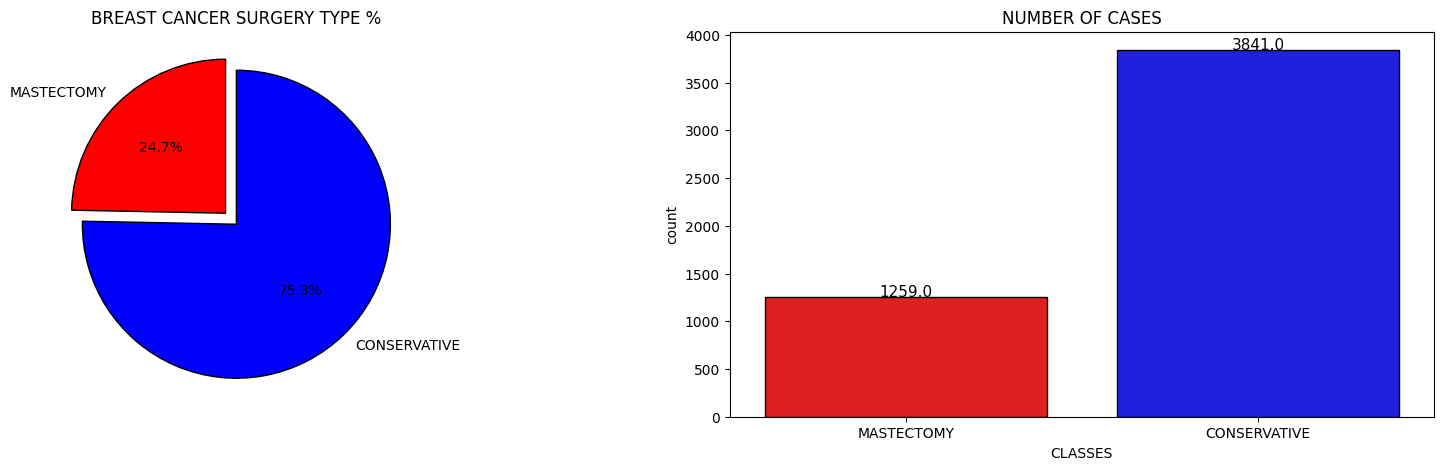

In [7]:
#visualizziamo graficamete il nostro target (CLASSES):
l = list(df['CLASSES'].value_counts()) #creo una lista con il conteggio dei valori presi una sola volta in 'CLASSES'
val = [l[1] / sum(l) * 100,l[0] / sum(l) * 100] #calcolo la percentuale per ogni valore

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
colors = ['red', 'blue']
# creiamo un iagramma a torta per la percentuale di malati e sani
plt.subplot(1,2,1)
plt.pie(val,labels = ['MASTECTOMY','CONSERVATIVE'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('BREAST CANCER SURGERY TYPE %');

plt.subplot(1,2,2) #creiamo un countplot per effettuare il conteggio dei malati e dei sani
ax = sns.countplot(x = 'CLASSES', data = df, palette = colors , edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['MASTECTOMY','CONSERVATIVE'])
plt.title('NUMBER OF CASES');
plt.show()

In [82]:
#'nascita' and 'dataintervento' have values that are not compatible with the date format
#in fact, they have \ instead of /
#proceed with the conversion of \ to /

In [83]:
if df['nascita'].dtype == 'object':
    #use the .str.replace() function to replace backslashes with slashes
    df['nascita'] = df['nascita'].str.replace('\\', '/', regex=False)
else:
    print("The column is not of type 'object'")

In [84]:
if df['dataintervento'].dtype == 'object':
    #use the .str.replace() function to replace backslashes with slashes
    df['dataintervento'] = df['dataintervento'].str.replace('\\', '/', regex=False)
else:
    print("The column is not of type 'object'")

In [85]:
df

,cognome,nascita,peso,altezza,fumo,gravidanza,allattamento,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),...,biRadsClinico,citologia,citologiacodifica,focalità,dataintervento,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,Zenca,15/12/34,NaN,NaN,si,no,NaN,si,no,NaN,...,E5 (Positivo,si,C5 - Maligno,,06/09/11,Destro,NaN,,MRM,MASTECTOMIA
1,Vorraro,11/01/66,NaN,NaN,no,no,NaN,no,NaN,NaN,...,,Non effettuata,,,29/05/07,Destro,NaN,,MRM,MASTECTOMIA
2,Vorraro,30/09/65,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,...,,,,,12/08/10,Destro,NaN,,MRM,MASTECTOMIA
3,Volpe,09/05/51,NaN,NaN,no,no,NaN,si,si,NaN,...,,no,,,11/09/07,Destro,NaN,,MRM,MASTECTOMIA
4,Vollero,19/08/25,NaN,NaN,NaN,NaN,NaN,NaN,no,no,...,,no,,,12/09/13,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,Gagliardi,04/01/70,55.0,159.0,no,no,NaN,no,si,NaN,...,,no si,C4 - Sospetto,si si,30/12/08,Sinistro Destro,Si,,WE,CONSERVATIVA
5096,D'Angelo,18/01/80,NaN,NaN,si,si,NaN,no,si,no,...,E3 (Dubbio),no,,,24/06/14,Sinistro,NaN,,WE,CONSERVATIVA
5097,Bello,10/01/64,NaN,NaN,NaN,NaN,NaN,no,si,NaN,...,,no,,,06/07/10,Sinistro Destro,Si,,WE,CONSERVATIVA
5098,Accardo,10/10/47,NaN,NaN,no,si,NaN,si,NaN,NaN,...,,no,,,03/07/14,Sinistro,NaN,,WE,CONSERVATIVA


In [86]:
#Group patients by surname and date of birth to identify duplicates

In [87]:
grouped = df.groupby(['cognome', 'nascita'])
duplicates = grouped.filter(lambda x: len(x) > 1)

In [88]:
indices = duplicates.index.tolist()

In [89]:
grouped_indices = duplicates.groupby(['cognome', 'nascita']).apply(lambda x: list(x.index))

/var/folders/kv/gcvrpnwx39gbcn4qnn41xt5m0000gn/T/ipykernel_1776/590628906.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_indices = duplicates.groupby(['cognome', 'nascita']).apply(lambda x: list(x.index))


In [90]:
#Identification, for each patient in the group, of the surgery date. Keeping the oldest date and removing the other patients
for group in grouped_indices:
    print(f"Duplicated rows: {group}")
    for idx in group:
        data_value = df.loc[idx, 'dataintervento']
        print(f"  Intervention date row ({idx}) = {data_value}")
        print()

Duplicated rows: [750, 5067]
  Intervention date row (750) = 13/12/05

  Intervention date row (5067) = 15/07/10

Duplicated rows: [1068, 4916]
  Intervention date row (1068) = 06/03/12

  Intervention date row (4916) = 24/01/12

Duplicated rows: [1067, 2874]
  Intervention date row (1067) = 27/01/11

  Intervention date row (2874) = 17/06/08

Duplicated rows: [2722, 4674]
  Intervention date row (2722) = 25/10/11

  Intervention date row (4674) = 23/10/08

Duplicated rows: [2711, 2712]
  Intervention date row (2711) = 03/09/09

  Intervention date row (2712) = 03/02/11

Duplicated rows: [607, 5054]
  Intervention date row (607) = 02/08/07

  Intervention date row (5054) = 20/07/10

Duplicated rows: [603, 681]
  Intervention date row (603) = 16/12/08

  Intervention date row (681) = 06/09/07

Duplicated rows: [2686, 4912]
  Intervention date row (2686) = 31/03/11

  Intervention date row (4912) = 13/06/13

Duplicated rows: [2684, 4727]
  Intervention date row (2684) = 09/12/03

  Inter

In [91]:
rows_to_remove = [5067, 1068, 1067, 2722, 2712, 5054, 603, 4912, 4727, 1061, 595, 4576, 4634, 4906, 4179, 
                 746, 4905, 5057, 4575, 4574, 5097, 1054, 4902, 1050, 4573, 1048, 4148, 2594, 744, 553, 1039, 
                 2559, 4572, 4074, 4072, 1026, 4891, 2513, 1021, 4045, 2473, 4884, 4017, 4352, 498, 494, 4630, 
                 1012, 4731, 1087, 1001, 470, 997, 3915, 4569, 434, 980, 2283, 4741, 978, 424, 4997, 2256, 2242, 
                 2232, 736, 2213, 4589, 4861, 4720, 3793, 2191, 396, 2184, 4568, 959, 958, 2161, 3766, 955, 4854, 
                 5049, 2130, 950, 951, 4739, 948, 3729, 753, 367, 5064, 937, 4849, 731, 4729, 925, 3665, 5037, 5048, 
                 1093, 4844, 4567, 4676, 4471, 917, 4513, 1997, 3612, 4566, 4738, 908, 4564, 726, 902, 900, 5046, 3539, 
                 4613, 294, 4561, 892, 1091, 4974, 1879, 4612, 4611, 3512, 4560, 4559, 3484, 4825, 5044, 1799, 1793, 244, 
                 5060, 863, 861, 3405, 1077, 221, 856, 3368, 849, 4809, 848, 207, 4807, 4558, 4717, 4687, 3296, 1629, 
                 4707, 3271, 4736, 4548, 4585, 1094, 4800, 3221, 4799, 1521, 821, 4555, 820, 818, 4684, 4795, 4683, 2771, 
                 3162, 4789, 4649, 3158, 4648, 5058, 645, 811, 3143, 1075, 4716, 4583, 3102, 1072, 4415, 4783, 87, 3078, 
                 5086, 1303, 1301, 4932, 4771, 3013, 1263, 4552, 782, 1259, 52, 780, 4551, 4680, 4715, 776, 775, 5041, 
                 770, 1190, 4760, 4597, 1177, 4356, 1168, 11, 4581, 4677, 4756, 5039, 4354, 4751, 4346, 5004, 4719, 897, 1787, 838, 868]

In [92]:
order_rows = sorted(rows_to_remove)
print(order_rows)

[11, 52, 87, 207, 221, 244, 294, 367, 396, 424, 434, 470, 494, 498, 553, 595, 603, 645, 726, 731, 736, 744, 746, 753, 770, 775, 776, 780, 782, 811, 818, 820, 821, 838, 848, 849, 856, 861, 863, 868, 892, 897, 900, 902, 908, 917, 925, 937, 948, 950, 951, 955, 958, 959, 978, 980, 997, 1001, 1012, 1021, 1026, 1039, 1048, 1050, 1054, 1061, 1067, 1068, 1072, 1075, 1077, 1087, 1091, 1093, 1094, 1168, 1177, 1190, 1259, 1263, 1301, 1303, 1521, 1629, 1787, 1793, 1799, 1879, 1997, 2130, 2161, 2184, 2191, 2213, 2232, 2242, 2256, 2283, 2473, 2513, 2559, 2594, 2712, 2722, 2771, 3013, 3078, 3102, 3143, 3158, 3162, 3221, 3271, 3296, 3368, 3405, 3484, 3512, 3539, 3612, 3665, 3729, 3766, 3793, 3915, 4017, 4045, 4072, 4074, 4148, 4179, 4346, 4352, 4354, 4356, 4415, 4471, 4513, 4548, 4551, 4552, 4555, 4558, 4559, 4560, 4561, 4564, 4566, 4567, 4568, 4569, 4572, 4573, 4574, 4575, 4576, 4581, 4583, 4585, 4589, 4597, 4611, 4612, 4613, 4630, 4634, 4648, 4649, 4676, 4677, 4680, 4683, 4684, 4687, 4707, 4715, 471

In [93]:
c = Counter(order_rows)
dup = [num for num, cont in c.items() if cont > 1]

print(dup)

[]


In [94]:
n_el = len(order_rows)
print(n_el)

228


In [95]:
df = df.drop(order_rows)

df = df.reset_index(drop=True)

In [96]:
df

,cognome,nascita,peso,altezza,fumo,gravidanza,allattamento,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),...,biRadsClinico,citologia,citologiacodifica,focalità,dataintervento,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,Zenca,15/12/34,NaN,NaN,si,no,NaN,si,no,NaN,...,E5 (Positivo,si,C5 - Maligno,,06/09/11,Destro,NaN,,MRM,MASTECTOMIA
1,Vorraro,11/01/66,NaN,NaN,no,no,NaN,no,NaN,NaN,...,,Non effettuata,,,29/05/07,Destro,NaN,,MRM,MASTECTOMIA
2,Vorraro,30/09/65,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,...,,,,,12/08/10,Destro,NaN,,MRM,MASTECTOMIA
3,Volpe,09/05/51,NaN,NaN,no,no,NaN,si,si,NaN,...,,no,,,11/09/07,Destro,NaN,,MRM,MASTECTOMIA
4,Vollero,19/08/25,NaN,NaN,NaN,NaN,NaN,NaN,no,no,...,,no,,,12/09/13,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,Generali,3/2/1955,NaN,NaN,no,si,NaN,no,si,NaN,...,,no,,,11/05/10,Sinistro Destro,Si,,WE,CONSERVATIVA
4868,Gagliardi,04/01/70,55.0,159.0,no,no,NaN,no,si,NaN,...,,no si,C4 - Sospetto,si si,30/12/08,Sinistro Destro,Si,,WE,CONSERVATIVA
4869,D'Angelo,18/01/80,NaN,NaN,si,si,NaN,no,si,no,...,E3 (Dubbio),no,,,24/06/14,Sinistro,NaN,,WE,CONSERVATIVA
4870,Accardo,10/10/47,NaN,NaN,no,si,NaN,si,NaN,NaN,...,,no,,,03/07/14,Sinistro,NaN,,WE,CONSERVATIVA


In [97]:
duplicated = df[df.duplicated(keep=False)]
print('Duplicated rows:')
print(duplicated)

Duplicated rows:
Empty DataFrame
Columns: [cognome, nascita, peso, altezza, fumo, gravidanza, allattamento, menopausa, casenofamiglia, familiarità carcinoma ovarico (vuoto =no), struttura_ghiandolare, rapporto _cuteDX, rapporto_cuteSX, rapporto_areola_capezzoloDX, rapporto_areola_capezzoloSX, stato_linfonodaleDX, stato_linfonodaleSX, biRadsClinico, citologia, citologiacodifica, focalità, dataintervento, latointervento, intervento_chirurgico_bilaterale, ricostruzione, DISEASE, CLASSES]
Index: []

[0 rows x 27 columns]


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   cognome                                    4872 non-null   object 
 1   nascita                                    4872 non-null   object 
 2   peso                                       402 non-null    float64
 3   altezza                                    179 non-null    float64
 4   fumo                                       4228 non-null   object 
 5   gravidanza                                 4042 non-null   object 
 6   allattamento                               0 non-null      float64
 7   menopausa                                  4000 non-null   object 
 8   casenofamiglia                             4515 non-null   object 
 9   familiarità carcinoma ovarico (vuoto =no)  929 non-null    object 
 10  struttura_ghiandolare   

In [99]:
df.to_csv('dataset_without_duplicates.csv', index=False)

In [100]:
df = pd.read_csv('dataset_without_duplicates.csv')
df

,cognome,nascita,peso,altezza,fumo,gravidanza,allattamento,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),...,biRadsClinico,citologia,citologiacodifica,focalità,dataintervento,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,Zenca,15/12/34,NaN,NaN,si,no,NaN,si,no,NaN,...,E5 (Positivo,si,C5 - Maligno,,06/09/11,Destro,NaN,,MRM,MASTECTOMIA
1,Vorraro,11/01/66,NaN,NaN,no,no,NaN,no,NaN,NaN,...,,Non effettuata,,,29/05/07,Destro,NaN,,MRM,MASTECTOMIA
2,Vorraro,30/09/65,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,...,,,,,12/08/10,Destro,NaN,,MRM,MASTECTOMIA
3,Volpe,09/05/51,NaN,NaN,no,no,NaN,si,si,NaN,...,,no,,,11/09/07,Destro,NaN,,MRM,MASTECTOMIA
4,Vollero,19/08/25,NaN,NaN,NaN,NaN,NaN,NaN,no,no,...,,no,,,12/09/13,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,Generali,3/2/1955,NaN,NaN,no,si,NaN,no,si,NaN,...,,no,,,11/05/10,Sinistro Destro,Si,,WE,CONSERVATIVA
4868,Gagliardi,04/01/70,55.0,159.0,no,no,NaN,no,si,NaN,...,,no si,C4 - Sospetto,si si,30/12/08,Sinistro Destro,Si,,WE,CONSERVATIVA
4869,D'Angelo,18/01/80,NaN,NaN,si,si,NaN,no,si,no,...,E3 (Dubbio),no,,,24/06/14,Sinistro,NaN,,WE,CONSERVATIVA
4870,Accardo,10/10/47,NaN,NaN,no,si,NaN,si,NaN,NaN,...,,no,,,03/07/14,Sinistro,NaN,,WE,CONSERVATIVA


In [101]:
#Having eliminated duplicates, the feature ‘cognome’ is no longer useful for analysis, so, also for privacy reasons, we proceed with the deletion:
df = df.drop(df.columns[0], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   nascita                                    4872 non-null   object 
 1   peso                                       402 non-null    float64
 2   altezza                                    179 non-null    float64
 3   fumo                                       4228 non-null   object 
 4   gravidanza                                 4042 non-null   object 
 5   allattamento                               0 non-null      float64
 6   menopausa                                  4000 non-null   object 
 7   casenofamiglia                             4515 non-null   object 
 8   familiarità carcinoma ovarico (vuoto =no)  929 non-null    object 
 9   struttura_ghiandolare                      4148 non-null   object 
 10  rapporto _cuteDX        

In [102]:
#Since it appears that the feature ‘allattamento’ has no non-zero value, it is deleted:
df = df.drop(df.columns[5], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   nascita                                    4872 non-null   object 
 1   peso                                       402 non-null    float64
 2   altezza                                    179 non-null    float64
 3   fumo                                       4228 non-null   object 
 4   gravidanza                                 4042 non-null   object 
 5   menopausa                                  4000 non-null   object 
 6   casenofamiglia                             4515 non-null   object 
 7   familiarità carcinoma ovarico (vuoto =no)  929 non-null    object 
 8   struttura_ghiandolare                      4148 non-null   object 
 9   rapporto _cuteDX                           4862 non-null   object 
 10  rapporto_cuteSX         

In [103]:
#Extraction of the year of birth and the year of surgery, from the features ‘nascita’ and ‘dataintervento’
#to obtain the age at first surgery

In [104]:
#conversion of feature ‘nascita’ into datetime format, handling mixed formats
df['nascita'] = pd.to_datetime(df['nascita'], dayfirst=True, errors='coerce')

/var/folders/kv/gcvrpnwx39gbcn4qnn41xt5m0000gn/T/ipykernel_1776/2725997429.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['nascita'] = pd.to_datetime(df['nascita'], dayfirst=True, errors='coerce')


In [105]:
df

,nascita,peso,altezza,fumo,gravidanza,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),struttura_ghiandolare,rapporto _cuteDX,...,biRadsClinico,citologia,citologiacodifica,focalità,dataintervento,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,2034-12-15,NaN,NaN,si,no,si,no,NaN,NaN,Edematosa+EsiCh,...,E5 (Positivo,si,C5 - Maligno,,06/09/11,Destro,NaN,,MRM,MASTECTOMIA
1,2066-01-11,NaN,NaN,no,no,no,NaN,NaN,Reperto normale,Regolare,...,,Non effettuata,,,29/05/07,Destro,NaN,,MRM,MASTECTOMIA
2,2065-09-30,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia fibrocistica,Esiti chirurgici,...,,,,,12/08/10,Destro,NaN,,MRM,MASTECTOMIA
3,2051-05-09,NaN,NaN,no,no,si,si,NaN,Displasi fibronodulare,Regolare,...,,no,,,11/09/07,Destro,NaN,,MRM,MASTECTOMIA
4,2025-08-19,NaN,NaN,NaN,NaN,NaN,no,no,Displasia fibroadiposa,Ulcerazione,...,,no,,,12/09/13,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,1955-02-03,NaN,NaN,no,si,no,si,NaN,Reperto normale,Esiti chirurgici,...,,no,,,11/05/10,Sinistro Destro,Si,,WE,CONSERVATIVA
4868,2070-01-04,55.0,159.0,no,no,no,si,NaN,Displasia fibronodulare,Regolare,...,,no si,C4 - Sospetto,si si,30/12/08,Sinistro Destro,Si,,WE,CONSERVATIVA
4869,1980-01-18,NaN,NaN,si,si,no,si,no,Displasi fibronodulare,Regolare,...,E3 (Dubbio),no,,,24/06/14,Sinistro,NaN,,WE,CONSERVATIVA
4870,2047-10-10,NaN,NaN,no,si,si,NaN,NaN,Reperto normale,Regolare,...,,no,,,03/07/14,Sinistro,NaN,,WE,CONSERVATIVA


In [106]:
#Function to force dates in the range of 1900-1999
def forza_1900(data):
    if data.year >= 2000:  
        return data.replace(year=data.year - 100)
    return data

In [107]:
df['nascita'] = df['nascita'].apply(forza_1900)

In [108]:
df['nascita'] = df['nascita'].dt.year

In [109]:
df

,nascita,peso,altezza,fumo,gravidanza,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),struttura_ghiandolare,rapporto _cuteDX,...,biRadsClinico,citologia,citologiacodifica,focalità,dataintervento,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,1934,NaN,NaN,si,no,si,no,NaN,NaN,Edematosa+EsiCh,...,E5 (Positivo,si,C5 - Maligno,,06/09/11,Destro,NaN,,MRM,MASTECTOMIA
1,1966,NaN,NaN,no,no,no,NaN,NaN,Reperto normale,Regolare,...,,Non effettuata,,,29/05/07,Destro,NaN,,MRM,MASTECTOMIA
2,1965,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia fibrocistica,Esiti chirurgici,...,,,,,12/08/10,Destro,NaN,,MRM,MASTECTOMIA
3,1951,NaN,NaN,no,no,si,si,NaN,Displasi fibronodulare,Regolare,...,,no,,,11/09/07,Destro,NaN,,MRM,MASTECTOMIA
4,1925,NaN,NaN,NaN,NaN,NaN,no,no,Displasia fibroadiposa,Ulcerazione,...,,no,,,12/09/13,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,1955,NaN,NaN,no,si,no,si,NaN,Reperto normale,Esiti chirurgici,...,,no,,,11/05/10,Sinistro Destro,Si,,WE,CONSERVATIVA
4868,1970,55.0,159.0,no,no,no,si,NaN,Displasia fibronodulare,Regolare,...,,no si,C4 - Sospetto,si si,30/12/08,Sinistro Destro,Si,,WE,CONSERVATIVA
4869,1980,NaN,NaN,si,si,no,si,no,Displasi fibronodulare,Regolare,...,E3 (Dubbio),no,,,24/06/14,Sinistro,NaN,,WE,CONSERVATIVA
4870,1947,NaN,NaN,no,si,si,NaN,NaN,Reperto normale,Regolare,...,,no,,,03/07/14,Sinistro,NaN,,WE,CONSERVATIVA


In [110]:
df['dataintervento'] = pd.to_datetime(df['dataintervento'], format='%d/%m/%y', dayfirst=True)

In [111]:
df

,nascita,peso,altezza,fumo,gravidanza,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),struttura_ghiandolare,rapporto _cuteDX,...,biRadsClinico,citologia,citologiacodifica,focalità,dataintervento,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,1934,NaN,NaN,si,no,si,no,NaN,NaN,Edematosa+EsiCh,...,E5 (Positivo,si,C5 - Maligno,,2011-09-06,Destro,NaN,,MRM,MASTECTOMIA
1,1966,NaN,NaN,no,no,no,NaN,NaN,Reperto normale,Regolare,...,,Non effettuata,,,2007-05-29,Destro,NaN,,MRM,MASTECTOMIA
2,1965,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia fibrocistica,Esiti chirurgici,...,,,,,2010-08-12,Destro,NaN,,MRM,MASTECTOMIA
3,1951,NaN,NaN,no,no,si,si,NaN,Displasi fibronodulare,Regolare,...,,no,,,2007-09-11,Destro,NaN,,MRM,MASTECTOMIA
4,1925,NaN,NaN,NaN,NaN,NaN,no,no,Displasia fibroadiposa,Ulcerazione,...,,no,,,2013-09-12,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,1955,NaN,NaN,no,si,no,si,NaN,Reperto normale,Esiti chirurgici,...,,no,,,2010-05-11,Sinistro Destro,Si,,WE,CONSERVATIVA
4868,1970,55.0,159.0,no,no,no,si,NaN,Displasia fibronodulare,Regolare,...,,no si,C4 - Sospetto,si si,2008-12-30,Sinistro Destro,Si,,WE,CONSERVATIVA
4869,1980,NaN,NaN,si,si,no,si,no,Displasi fibronodulare,Regolare,...,E3 (Dubbio),no,,,2014-06-24,Sinistro,NaN,,WE,CONSERVATIVA
4870,1947,NaN,NaN,no,si,si,NaN,NaN,Reperto normale,Regolare,...,,no,,,2014-07-03,Sinistro,NaN,,WE,CONSERVATIVA


In [112]:
df['dataintervento'] = df['dataintervento'].dt.year

In [113]:
df

,nascita,peso,altezza,fumo,gravidanza,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),struttura_ghiandolare,rapporto _cuteDX,...,biRadsClinico,citologia,citologiacodifica,focalità,dataintervento,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,1934,NaN,NaN,si,no,si,no,NaN,NaN,Edematosa+EsiCh,...,E5 (Positivo,si,C5 - Maligno,,2011.0,Destro,NaN,,MRM,MASTECTOMIA
1,1966,NaN,NaN,no,no,no,NaN,NaN,Reperto normale,Regolare,...,,Non effettuata,,,2007.0,Destro,NaN,,MRM,MASTECTOMIA
2,1965,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia fibrocistica,Esiti chirurgici,...,,,,,2010.0,Destro,NaN,,MRM,MASTECTOMIA
3,1951,NaN,NaN,no,no,si,si,NaN,Displasi fibronodulare,Regolare,...,,no,,,2007.0,Destro,NaN,,MRM,MASTECTOMIA
4,1925,NaN,NaN,NaN,NaN,NaN,no,no,Displasia fibroadiposa,Ulcerazione,...,,no,,,2013.0,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,1955,NaN,NaN,no,si,no,si,NaN,Reperto normale,Esiti chirurgici,...,,no,,,2010.0,Sinistro Destro,Si,,WE,CONSERVATIVA
4868,1970,55.0,159.0,no,no,no,si,NaN,Displasia fibronodulare,Regolare,...,,no si,C4 - Sospetto,si si,2008.0,Sinistro Destro,Si,,WE,CONSERVATIVA
4869,1980,NaN,NaN,si,si,no,si,no,Displasi fibronodulare,Regolare,...,E3 (Dubbio),no,,,2014.0,Sinistro,NaN,,WE,CONSERVATIVA
4870,1947,NaN,NaN,no,si,si,NaN,NaN,Reperto normale,Regolare,...,,no,,,2014.0,Sinistro,NaN,,WE,CONSERVATIVA


In [114]:
df['dataintervento'] = df['dataintervento'].astype('Int64')

In [115]:
df

,nascita,peso,altezza,fumo,gravidanza,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),struttura_ghiandolare,rapporto _cuteDX,...,biRadsClinico,citologia,citologiacodifica,focalità,dataintervento,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,1934,NaN,NaN,si,no,si,no,NaN,NaN,Edematosa+EsiCh,...,E5 (Positivo,si,C5 - Maligno,,2011,Destro,NaN,,MRM,MASTECTOMIA
1,1966,NaN,NaN,no,no,no,NaN,NaN,Reperto normale,Regolare,...,,Non effettuata,,,2007,Destro,NaN,,MRM,MASTECTOMIA
2,1965,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia fibrocistica,Esiti chirurgici,...,,,,,2010,Destro,NaN,,MRM,MASTECTOMIA
3,1951,NaN,NaN,no,no,si,si,NaN,Displasi fibronodulare,Regolare,...,,no,,,2007,Destro,NaN,,MRM,MASTECTOMIA
4,1925,NaN,NaN,NaN,NaN,NaN,no,no,Displasia fibroadiposa,Ulcerazione,...,,no,,,2013,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,1955,NaN,NaN,no,si,no,si,NaN,Reperto normale,Esiti chirurgici,...,,no,,,2010,Sinistro Destro,Si,,WE,CONSERVATIVA
4868,1970,55.0,159.0,no,no,no,si,NaN,Displasia fibronodulare,Regolare,...,,no si,C4 - Sospetto,si si,2008,Sinistro Destro,Si,,WE,CONSERVATIVA
4869,1980,NaN,NaN,si,si,no,si,no,Displasi fibronodulare,Regolare,...,E3 (Dubbio),no,,,2014,Sinistro,NaN,,WE,CONSERVATIVA
4870,1947,NaN,NaN,no,si,si,NaN,NaN,Reperto normale,Regolare,...,,no,,,2014,Sinistro,NaN,,WE,CONSERVATIVA


In [116]:
df['nascita'] = df['nascita'].astype('Int64')

In [117]:
df

,nascita,peso,altezza,fumo,gravidanza,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),struttura_ghiandolare,rapporto _cuteDX,...,biRadsClinico,citologia,citologiacodifica,focalità,dataintervento,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,1934,NaN,NaN,si,no,si,no,NaN,NaN,Edematosa+EsiCh,...,E5 (Positivo,si,C5 - Maligno,,2011,Destro,NaN,,MRM,MASTECTOMIA
1,1966,NaN,NaN,no,no,no,NaN,NaN,Reperto normale,Regolare,...,,Non effettuata,,,2007,Destro,NaN,,MRM,MASTECTOMIA
2,1965,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia fibrocistica,Esiti chirurgici,...,,,,,2010,Destro,NaN,,MRM,MASTECTOMIA
3,1951,NaN,NaN,no,no,si,si,NaN,Displasi fibronodulare,Regolare,...,,no,,,2007,Destro,NaN,,MRM,MASTECTOMIA
4,1925,NaN,NaN,NaN,NaN,NaN,no,no,Displasia fibroadiposa,Ulcerazione,...,,no,,,2013,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,1955,NaN,NaN,no,si,no,si,NaN,Reperto normale,Esiti chirurgici,...,,no,,,2010,Sinistro Destro,Si,,WE,CONSERVATIVA
4868,1970,55.0,159.0,no,no,no,si,NaN,Displasia fibronodulare,Regolare,...,,no si,C4 - Sospetto,si si,2008,Sinistro Destro,Si,,WE,CONSERVATIVA
4869,1980,NaN,NaN,si,si,no,si,no,Displasi fibronodulare,Regolare,...,E3 (Dubbio),no,,,2014,Sinistro,NaN,,WE,CONSERVATIVA
4870,1947,NaN,NaN,no,si,si,NaN,NaN,Reperto normale,Regolare,...,,no,,,2014,Sinistro,NaN,,WE,CONSERVATIVA


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   nascita                                    4872 non-null   Int64  
 1   peso                                       402 non-null    float64
 2   altezza                                    179 non-null    float64
 3   fumo                                       4228 non-null   object 
 4   gravidanza                                 4042 non-null   object 
 5   menopausa                                  4000 non-null   object 
 6   casenofamiglia                             4515 non-null   object 
 7   familiarità carcinoma ovarico (vuoto =no)  929 non-null    object 
 8   struttura_ghiandolare                      4148 non-null   object 
 9   rapporto _cuteDX                           4862 non-null   object 
 10  rapporto_cuteSX         

In [119]:
df['eta_intervento'] = df['dataintervento'] - df['nascita'] 

In [120]:
df

,nascita,peso,altezza,fumo,gravidanza,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),struttura_ghiandolare,rapporto _cuteDX,...,citologia,citologiacodifica,focalità,dataintervento,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES,eta_intervento
0,1934,NaN,NaN,si,no,si,no,NaN,NaN,Edematosa+EsiCh,...,si,C5 - Maligno,,2011,Destro,NaN,,MRM,MASTECTOMIA,77
1,1966,NaN,NaN,no,no,no,NaN,NaN,Reperto normale,Regolare,...,Non effettuata,,,2007,Destro,NaN,,MRM,MASTECTOMIA,41
2,1965,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia fibrocistica,Esiti chirurgici,...,,,,2010,Destro,NaN,,MRM,MASTECTOMIA,45
3,1951,NaN,NaN,no,no,si,si,NaN,Displasi fibronodulare,Regolare,...,no,,,2007,Destro,NaN,,MRM,MASTECTOMIA,56
4,1925,NaN,NaN,NaN,NaN,NaN,no,no,Displasia fibroadiposa,Ulcerazione,...,no,,,2013,Sinistro,NaN,,MRM,MASTECTOMIA,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,1955,NaN,NaN,no,si,no,si,NaN,Reperto normale,Esiti chirurgici,...,no,,,2010,Sinistro Destro,Si,,WE,CONSERVATIVA,55
4868,1970,55.0,159.0,no,no,no,si,NaN,Displasia fibronodulare,Regolare,...,no si,C4 - Sospetto,si si,2008,Sinistro Destro,Si,,WE,CONSERVATIVA,38
4869,1980,NaN,NaN,si,si,no,si,no,Displasi fibronodulare,Regolare,...,no,,,2014,Sinistro,NaN,,WE,CONSERVATIVA,34
4870,1947,NaN,NaN,no,si,si,NaN,NaN,Reperto normale,Regolare,...,no,,,2014,Sinistro,NaN,,WE,CONSERVATIVA,67


In [121]:
df = df.dropna(subset=['dataintervento'])

In [122]:
df

,nascita,peso,altezza,fumo,gravidanza,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),struttura_ghiandolare,rapporto _cuteDX,...,citologia,citologiacodifica,focalità,dataintervento,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES,eta_intervento
0,1934,NaN,NaN,si,no,si,no,NaN,NaN,Edematosa+EsiCh,...,si,C5 - Maligno,,2011,Destro,NaN,,MRM,MASTECTOMIA,77
1,1966,NaN,NaN,no,no,no,NaN,NaN,Reperto normale,Regolare,...,Non effettuata,,,2007,Destro,NaN,,MRM,MASTECTOMIA,41
2,1965,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia fibrocistica,Esiti chirurgici,...,,,,2010,Destro,NaN,,MRM,MASTECTOMIA,45
3,1951,NaN,NaN,no,no,si,si,NaN,Displasi fibronodulare,Regolare,...,no,,,2007,Destro,NaN,,MRM,MASTECTOMIA,56
4,1925,NaN,NaN,NaN,NaN,NaN,no,no,Displasia fibroadiposa,Ulcerazione,...,no,,,2013,Sinistro,NaN,,MRM,MASTECTOMIA,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,1955,NaN,NaN,no,si,no,si,NaN,Reperto normale,Esiti chirurgici,...,no,,,2010,Sinistro Destro,Si,,WE,CONSERVATIVA,55
4868,1970,55.0,159.0,no,no,no,si,NaN,Displasia fibronodulare,Regolare,...,no si,C4 - Sospetto,si si,2008,Sinistro Destro,Si,,WE,CONSERVATIVA,38
4869,1980,NaN,NaN,si,si,no,si,no,Displasi fibronodulare,Regolare,...,no,,,2014,Sinistro,NaN,,WE,CONSERVATIVA,34
4870,1947,NaN,NaN,no,si,si,NaN,NaN,Reperto normale,Regolare,...,no,,,2014,Sinistro,NaN,,WE,CONSERVATIVA,67


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4868 entries, 0 to 4871
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   nascita                                    4868 non-null   Int64  
 1   peso                                       402 non-null    float64
 2   altezza                                    179 non-null    float64
 3   fumo                                       4225 non-null   object 
 4   gravidanza                                 4040 non-null   object 
 5   menopausa                                  3997 non-null   object 
 6   casenofamiglia                             4512 non-null   object 
 7   familiarità carcinoma ovarico (vuoto =no)  929 non-null    object 
 8   struttura_ghiandolare                      4144 non-null   object 
 9   rapporto _cuteDX                           4858 non-null   object 
 10  rapporto_cuteSX              

In [124]:
#Having calculated the age of each patient at the first intervention, the features ‘nascita’ and ‘dataintervento’ are no longer useful for the analysis
df = df.drop(df.columns[0], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4868 entries, 0 to 4871
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   peso                                       402 non-null    float64
 1   altezza                                    179 non-null    float64
 2   fumo                                       4225 non-null   object 
 3   gravidanza                                 4040 non-null   object 
 4   menopausa                                  3997 non-null   object 
 5   casenofamiglia                             4512 non-null   object 
 6   familiarità carcinoma ovarico (vuoto =no)  929 non-null    object 
 7   struttura_ghiandolare                      4144 non-null   object 
 8   rapporto _cuteDX                           4858 non-null   object 
 9   rapporto_cuteSX                            4859 non-null   object 
 10  rapporto_areola_capezzoloDX  

In [125]:
df = df.drop(df.columns[18], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4868 entries, 0 to 4871
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   peso                                       402 non-null    float64
 1   altezza                                    179 non-null    float64
 2   fumo                                       4225 non-null   object 
 3   gravidanza                                 4040 non-null   object 
 4   menopausa                                  3997 non-null   object 
 5   casenofamiglia                             4512 non-null   object 
 6   familiarità carcinoma ovarico (vuoto =no)  929 non-null    object 
 7   struttura_ghiandolare                      4144 non-null   object 
 8   rapporto _cuteDX                           4858 non-null   object 
 9   rapporto_cuteSX                            4859 non-null   object 
 10  rapporto_areola_capezzoloDX  

In [126]:
eta = df.pop('eta_intervento')
df.insert(0, 'eta_intervento', eta)

In [127]:
df

,eta_intervento,peso,altezza,fumo,gravidanza,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),struttura_ghiandolare,rapporto _cuteDX,...,stato_linfonodaleSX,biRadsClinico,citologia,citologiacodifica,focalità,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,77,NaN,NaN,si,no,si,no,NaN,NaN,Edematosa+EsiCh,...,Non adenopatie,E5 (Positivo,si,C5 - Maligno,,Destro,NaN,,MRM,MASTECTOMIA
1,41,NaN,NaN,no,no,no,NaN,NaN,Reperto normale,Regolare,...,Non adenopatie,,Non effettuata,,,Destro,NaN,,MRM,MASTECTOMIA
2,45,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia fibrocistica,Esiti chirurgici,...,Non adenopatie,,,,,Destro,NaN,,MRM,MASTECTOMIA
3,56,NaN,NaN,no,no,si,si,NaN,Displasi fibronodulare,Regolare,...,Non adenopatie,,no,,,Destro,NaN,,MRM,MASTECTOMIA
4,88,NaN,NaN,NaN,NaN,NaN,no,no,Displasia fibroadiposa,Ulcerazione,...,Non adenopatie,,no,,,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,55,NaN,NaN,no,si,no,si,NaN,Reperto normale,Esiti chirurgici,...,Non adenopatie,,no,,,Sinistro Destro,Si,,WE,CONSERVATIVA
4868,38,55.0,159.0,no,no,no,si,NaN,Displasia fibronodulare,Regolare,...,Non adenopatie,,no si,C4 - Sospetto,si si,Sinistro Destro,Si,,WE,CONSERVATIVA
4869,34,NaN,NaN,si,si,no,si,no,Displasi fibronodulare,Regolare,...,Non adenopatie,E3 (Dubbio),no,,,Sinistro,NaN,,WE,CONSERVATIVA
4870,67,NaN,NaN,no,si,si,NaN,NaN,Reperto normale,Regolare,...,Non adenopatie,,no,,,Sinistro,NaN,,WE,CONSERVATIVA


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4868 entries, 0 to 4871
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   eta_intervento                             4868 non-null   Int64  
 1   peso                                       402 non-null    float64
 2   altezza                                    179 non-null    float64
 3   fumo                                       4225 non-null   object 
 4   gravidanza                                 4040 non-null   object 
 5   menopausa                                  3997 non-null   object 
 6   casenofamiglia                             4512 non-null   object 
 7   familiarità carcinoma ovarico (vuoto =no)  929 non-null    object 
 8   struttura_ghiandolare                      4144 non-null   object 
 9   rapporto _cuteDX                           4858 non-null   object 
 10  rapporto_cuteSX              

In [129]:
df.to_csv('dataset_before_label_consolidation.csv', index=False)

In [130]:
df = pd.read_csv('dataset_before_label_consolidation.csv')
df

,eta_intervento,peso,altezza,fumo,gravidanza,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),struttura_ghiandolare,rapporto _cuteDX,...,stato_linfonodaleSX,biRadsClinico,citologia,citologiacodifica,focalità,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,77,NaN,NaN,si,no,si,no,NaN,NaN,Edematosa+EsiCh,...,Non adenopatie,E5 (Positivo,si,C5 - Maligno,,Destro,NaN,,MRM,MASTECTOMIA
1,41,NaN,NaN,no,no,no,NaN,NaN,Reperto normale,Regolare,...,Non adenopatie,,Non effettuata,,,Destro,NaN,,MRM,MASTECTOMIA
2,45,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia fibrocistica,Esiti chirurgici,...,Non adenopatie,,,,,Destro,NaN,,MRM,MASTECTOMIA
3,56,NaN,NaN,no,no,si,si,NaN,Displasi fibronodulare,Regolare,...,Non adenopatie,,no,,,Destro,NaN,,MRM,MASTECTOMIA
4,88,NaN,NaN,NaN,NaN,NaN,no,no,Displasia fibroadiposa,Ulcerazione,...,Non adenopatie,,no,,,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,55,NaN,NaN,no,si,no,si,NaN,Reperto normale,Esiti chirurgici,...,Non adenopatie,,no,,,Sinistro Destro,Si,,WE,CONSERVATIVA
4864,38,55.0,159.0,no,no,no,si,NaN,Displasia fibronodulare,Regolare,...,Non adenopatie,,no si,C4 - Sospetto,si si,Sinistro Destro,Si,,WE,CONSERVATIVA
4865,34,NaN,NaN,si,si,no,si,no,Displasi fibronodulare,Regolare,...,Non adenopatie,E3 (Dubbio),no,,,Sinistro,NaN,,WE,CONSERVATIVA
4866,67,NaN,NaN,no,si,si,NaN,NaN,Reperto normale,Regolare,...,Non adenopatie,,no,,,Sinistro,NaN,,WE,CONSERVATIVA


In [131]:
#removal of non-printable characters such as \x1d and other control characters
def clean_text(text):
    if isinstance(text, str):
        return re.sub(r'[\x00-\x1F\x7F]', '', text)
    return text

In [132]:
df = df.apply(lambda col: col.map(clean_text))

In [133]:
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numeric variables:", numerical_columns)

Numeric variables: Index(['eta_intervento', 'peso', 'altezza'], dtype='object')


In [134]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical variables:", categorical_columns)

Categorical variables: Index(['fumo', 'gravidanza', 'menopausa', 'casenofamiglia',
       'familiarità carcinoma ovarico (vuoto =no)', 'struttura_ghiandolare',
       'rapporto _cuteDX', 'rapporto_cuteSX', 'rapporto_areola_capezzoloDX',
       'rapporto_areola_capezzoloSX', 'stato_linfonodaleDX',
       'stato_linfonodaleSX', 'biRadsClinico', 'citologia',
       'citologiacodifica', 'focalità', 'latointervento',
       'intervento_chirurgico_bilaterale', 'ricostruzione', 'DISEASE',
       'CLASSES'],
      dtype='object')


In [135]:
#number of labels and unique values for each categorical variable
for col in categorical_columns:
    print(f"Variabile'{col}' ha {df[col].nunique()} etichette uniche.")
    print(f"Etichette: {df[col].unique()}\n")

Variabile'fumo' ha 2 etichette uniche.
Etichette: ['si' 'no' nan]

Variabile'gravidanza' ha 2 etichette uniche.
Etichette: ['no' nan 'si']

Variabile'menopausa' ha 3 etichette uniche.
Etichette: ['si' 'no' nan 'sino']

Variabile'casenofamiglia' ha 2 etichette uniche.
Etichette: ['no' nan 'si']

Variabile'familiarità carcinoma ovarico (vuoto =no)' ha 2 etichette uniche.
Etichette: [nan 'no' 'si']

Variabile'struttura_ghiandolare' ha 26 etichette uniche.
Etichette: [nan 'Reperto normale' 'Displasia fibrocistica' 'Displasi fibronodulare'
 'Displasia fibroadiposa' 'Inv fibroadiposa' 'Displasia fibronodulare'
 'Displasia fibrosa' 'Displasia semplice' 'Involuzione fibroadiposa'
 'Involuzione adiposa' 'Adenosi nodulare' 'Distrofia fibroadiposa'
 'addensamento' 'Displasia micronodulare' 'Esiti Postattinici'
 'Displasia nodulare' 'Mod gravidiche' 'Displasi fibronodulare/Inv F'
 'ispessimento nodulare atipico' 'normale' 'Displasia Fibroadenosica'
 'Reperto normale (1/6/00)' 'Mastoplastica additi

In [136]:
#LABEL CONSOLIDATION

In [137]:
trasformazioni_citologia = {
    'si': ['si', 'sisi', 'sisisi'],
    'no': ['Non effettuata', 'no', 'nono', 'Non effettuatano', 'Non effettuatasi'],
    'Bil:si-no/no-si': ['sino', 'nosi']
}

trasformazioni_focalita = {
    'si': ['si', 'sisi', ],
    'no': ['no', 'nono', ],
    'Bil:si-no/no-si': ['sino', 'nosi']
}

trasformazioni_latointervento = {
    'Destro': ['Destro'],
    'Sinistro': ['Sinistro', 'sinistro', 'Sinistra'],
    'Bilaterale': ['Bilaterale', 'DestroSinistro', 'SinistroDestro', 'BilateraleDestro', 'BilateraleSinistro']
}

trasformazioni_intervento_chirurgico_bilaterale = {
    'si': ['si', 'Si']
}

trasformazioni_ricostruzione = {
    'si': ['Si', 'si']
}

trasformazioni_biRadsClinico = {
    'E0': ['E0 - Non eseguito', 'E0 (Negativo)', ],
    'E1': ['E1 - LNP', 'E1 (LNP)', 'E1 - LNP o Negativo', 'E1 (LNP)E1 (LNP)', ],
    'E2': ['E2 - Benigno', ],
    'E3': ['E3 - Dubbio', 'E3 (Dubbio)', ],
    'E4': ['E4 - Sospetto', 'E4 (Altamente Sospetto)', 'E4 (Altamente Sospetto)E4 (Altamente Sospetto)', 'E4 - SospettoE4 - Sospetto', '4c', '4b', 'E0 - Non eseguitoE4 - Sospetto', 'E4 (Altamente Sospetto)E0 (Negativo)', ],
    'E5': ['E5 (Positivo', 'E5 - Positivo', 'E5 - PositivoE5 - PositivoE5 - Positivo', 'E5 - PositivoE5 - Positivo', 'E5 (PositivoE0 (Negativo)'],
    'Bil:E5-E3/E3-E5': ['E5 (PositivoE3 (Dubbio)'],
    'Bil:E4-E3/E3-E4': ['E4 (Altamente Sospetto)E3 (Dubbio)'],
    'Bil:E5-E4/E4-E5': ['E5 (PositivoE4 (Altamente Sospetto)'],
    'Bil:E1-E3/E3-E1': ['E1 (LNP)E3 (Dubbio)', 'E3 (Dubbio)E1 (LNP)'],
    'Bil:E4-E1/E1-E4': ['E4 (Altamente Sospetto)E1 (LNP)'],
    'Bil:E5-E1/E1-E5': ['E5 (PositivoE1 (LNP)', 'E5 - PositivoE1 - LNP'],
    'Bil:E5-E2/E2-E5': ['E5 (PositivoE2 (Benigno)']
}

trasformazioni_struttura_ghiandolare = {
    'Normale': ['Reperto normale', 'normale', 'Reperto normale (1/6/00)'],
    'Displasia': ['Displasia semplice'],
    'Displasia_fibronodulare': ['Displasi fibronodulare', 'Displasi fibronodulare/Inv F', 'ispessimento nodulare atipico', 'Displasia fibronodulare'],
    'Displasia_fibroadiposa': ['Displasia fibroadiposa'],
    'Displasia_fibrosa': ['Displasia fibrosa'],
    'Displasia_nodulare': ['Displasia nodulare'],
    'Displasia_micronodulare': ['Displasia micronodulare'],
    'Displasia_fibrocistica': ['Displasia fibrocistica'],
    'Displasia_fibroghiandolare': ['Displasia fibroghiandolare'],
    'Displasia_fibroadenosa': ['Displasia Fibroadenosica', 'Displasia fibroadenosica'],
    'Involuzione_fibroadiposa': ['Inv fibroadiposa', 'Involuzione fibroadiposa'],
    'Involuzione_adiposa': ['Involuzione adiposa'], 
    'Adenosi': ['Adenosi nodulare', 'addensamento'],
    'Distrofia': ['Distrofia fibroadiposa'],
    'Esiti_chirurgici': ['Esiti Postattinici', 'Mastoplastica additiva'],
    'Modifiche': ['Mod gravidiche', 'Mod da allattamento']
}

trasformazioni_rapporto_areola_capezzolo = {
    'Regolare': ['Regolare', 'Regolare capezzolo', 'Regolare', 'Regolare '],
    'Retrazione': ['Retrazione', 'Retrazione/Introf', 'Retrazione parziale', 'Iniz Retrazione', 'Retrazione e invasivitˆ', 'Retrazione', 'Retrazione indotta', 'Retrazione ', 'Retrazione CAPEZZOLO'],
    'Scraping': ['scerping', 'Screping', 'screeping'],
    'Ulcerazione': ['Ulcerazione', 'Ulcerazione'],
    'Edema': ['edem-papule', ' edematosa'],
    'Introflessione': ['Introflessione', 'Introflessione', 'Introflesso'],
    'Infiltrazione': ['Infiltrazione', 'Infiltrazione', ],
    'Non_distinguibile': ['Non distinguibili'],
    'Esiti_chirurgici': ['Esiti chirurgici', 'Esiti Chirurgic', 'esiti chirurgici', 'es chir', 'Esiti chirurgici', 'Telectomia', 'esiti di telectomia'],
    'Appiattito': ['Appiattiti', 'Appiattito', 'appianato', 'appianato', 'Appiattiti', 'Appianato'],
    'Assente': ['Assente', 'assente', 'assente', 'Assente'],
    'Secrezione': ['secremmonorifiz', 'secrezione', 'secrezione sierosa', 'sec sieroematica', 'Secrezione ematica'],
    'Disepitelizzazione': ['Disepitelizzata', 'Disepitelizzata', 'Disepitelizzato'],
    'Ispessimento': ['Ispessimento', 'ispessita', 'addensato']
}

trasformazioni_stato_linfonodale = {
    'Normale': ['Non adenopatie', 'Piccoli linfonodi', 'Piccoli linfonodi', 'Non adenopatie', 'Regolare', 'Piccoli '],
    'Adenopatia': ['Adenopatie ', 'adenopatie', ' adenopatie', 'Adenopatie', 'grossa adenopatia', 'Piccole adenopatie', 'Adenopatia', 'linfoadenopatie', 
                  'linfonodi tumefatti', 'linfoadenopatia', 'microadenopatie', 'Linfoadenopatia', 'Linfoadenopatie', 'Microadenopatie', 'adenopatie Satellite', 
                  'Linfoadenopatie', 'Adenopatie ', ' adenopatie', 'adenopatie', 'Adenopatie', 'piccole adenopatie', 'Microadenopatie', 'Adenopatie      ascellari', 
                  'Adenopatie e', 'Adenopatiee', 'Adenopatia', 'Microadenopatie ', ' Adenopatie', 'micro adenopatie ', 'poliadenopatie '],
    'Pacchetto_linfonodale': ['Pacchetto linfonodale', 'linfonodi', 'Pacchetto linfonodale'],
    'Esiti_chirurgici': ['esiti chirurgici', 'Esiti diss asc 2002', 'Esiti chirurgici', 'cicatrice da AxD pregressa', 'Es  AX D',  
                        'Esiti Chirurgicie', 'esiti chir', 'Eisto chir', 'esiti chirurgici', 'Esiti chirurgici', 'Es chir ', 'Es Chir LNS'],
    'Sospetto_adenopatia': ['Adenopatie sospette', 'Adenopatie sospette']
}

trasformazioni_citologia_codifica = {
    'C0': ['C0 - Non effettuato', 'C0 - Non effettuatoC0 - Non effettuato', 'Materiale amorfo eosinofilo'],
    
    'C1': ['C1 - Inadeguato', 'Inconclusivo', 'Incoclusivo', 'non conclusivo', 'Non conclusivo', 'inconclusivo', 'Non conclusiva', 'Non Significativo', 'inadeguato', 'si demanda al definitivo', 'Non diagnostico'],
    
    'C2': ['C2 - Negativo', 'C2 - Benigno', 'C2', 'C2 - Negativo FI', 'C2(non definite atipie)', 'negativo', 'A dx :neg', 'Adipociti', 'Non atipie', 'LABC', 'Granuloma lipofagico'],
    
    'C3': ['C3 - Dubbio', 'C3', 'C3 con atipie', 'C3 - DubbioC3 - Dubbio', 'atipie', 'Atipie', 'Atipie sospette x ca', 'ATIPIE', 'Atipie riferibili a ca', 'Atipèie', 
           'Apitie sospette per neoplasia', 'Proliferazione duttale tipo papillare', 'neoplasia mammaria', 'Neoplasia papillare'],
    
    'C4': ['C4', 'C4 - Sospetto', 'c4', '4c', 'C4 - SospettoC4 - Sospetto', 'T Fillode', 'Cons Vetr: inconclusivo   Fnab fi:C4', 'Sospetto', 'sospetto', 'C3/4 - Dubbio/Sospetto', 'C3 - Dubbio/C4', 'C3 - C4', 'C3-C4'],
    
    'C5': ['C5 - Maligno', 'C5', 'C5 - Positivo', 'C5 +Meta linf ', 'Bil:C5', 'C5 bilaterale', 'C5 - MalignoC5 - Maligno', 'C5:QSE sx', 
           'C5 a sx', 'c5', 'C5 ', 'C5 (lobulare)', 'C5 - MalignoC5 - Positivo', 'C5+meta linf ascell', 'C5 - Maligno FI', 'C5C5 - Maligno', 
           'C5 con meta ascell', 'C5 +Meta ascell', 'DX :C5     SX :non diagnostico', 'C0 - Non effettuatoC5 - Positivo', 'C5 - Maligno (CDI)', 
           'C5 - PositivoC5 - Positivo', 'C5 + R5', 'C5 - PositivoC0 - Non effettuato', 'C5 a dx', 'Sx:C5   Dx:inadeguato', 'C5 su adenopatia sovraclaveare dx', 'maligno', 
           'Pos x cell Maligne', 'Positivo x cell maligne con linf sede di meta', 'Positivo', 'FNAB su linfoadenopatiapositivo x cell maligne di tipo epitelio  ghiandolare', 
           'Pos x cell maligne', 'Positiva', 'CDI G2', 'CDI', 'CDLI  G2 ', 'positivo', 'CDI G3', 'CDI G3Er e PgR neg Ki 67:45 Cerb B2 :3+', 'CLI G3', 
           'C5 G1', 'C5 sulla lesione in QSE', 'CDI g2', 'CLI', 'CLIG2', 'Ca dutt G2', 'Ca dutto-lobulare', 'Ca intradutale', 'Carcinoma duttale in situ G1', 
           'Cc inf tipo tubulare G1', 'C5;   CDI G2 ', 'Ca duttale infiltrante G3 ER', 'CDI di tipo mucinoso G1 ER 90', 'DCIS cribriforme', 'DCIS', 'Pos x ca', 'Ca mammario inf', 
           'CA lobulare  ', 'Cell Ca', 'Ca pseudopapillare', 'ca in situ +comedoca', 'pT1 b G2 pN1/1d', 'ca tubulare 8 mm', 'CDI ER:85;PgR:85;Ki 67:8;CerbB2:0', 'N+', 'Ca', 'Paget', 
           'FNAB in QUI (C5) ed UQS (C4)', 'C5 - MalignoC3 - Dubbio', 'C4 / C5', 'C4 - SospettoC5 - Maligno', 'C5 - C4 - Maligno/Sospetto', 'C4 - C5', 'C4\\C5', 'C4 - Sospetto/C5', 'C4-C5', 
           'C5 - MalignoC2 - Negativo', 'C5 - PositivoC4 - Sospetto', 'C4 esterno/ RVE INT C5', 'C4/C5', 'C5 - MalignoC1 - Inadeguato'],

    'Bil:C5-C4/C4-C5': ['C5 - MalignoC4 - Sospetto', 'Sx -C4   Dx-C5'],

    'Bil:C5-C3/C3-C5': ['Sx:pos x cell maligne; DxAtipie', 'SX:atipie;Dx :ca intraduttale']
}
 
trasformazioni_rapporto_cute = { 
    'Regolare': ['Regolare', 'Regolare'], 

    'Esiti_BCS': ['Esiti chir QSE\\WE', 'Esiti by  QSE ', 'Esiti chir By', 'Es chirWE QSE 1997', 'Esiti  QUART 1993', 'Esiti QUART 1992','Esiti QUR', 
                  'Esiti  QUART(00)', 'Esiti By+quadro mastit', 'Es WE EIE07  ', 'Esit QUART', 'Esiti chir  QUR', 'Esiti chir QUAD', 'Esiti  QUART', 
                  "Esiti QUART '94", 'es by  emisf sup ', 'Esiti chir QUARTi', 'Esiti WE nov 07', 'Esiti chir By i', 'Esiti chir by QSE', 'Es core by', 
                  'Esiti QUART 00 ', 'Esiti chir by asc', 'Esiti chir QUART 92i', 'Esiti chir QUART i', 'Es  By QSE', 'Esiti chir WE 94', 'Esiti chir WEi', 
                  'Esiti chir  by', 'Esiti By','Esiti chirurgici EE', "Es QUART '97  ", 'Esiti WE ', 'Esiti chirur dupl By', 'Esiti chirur WE', 
                  'Esiti chir by', 'Esiti QUAD  2004-07', 'Esiti di WE nel 03', 'Es By', 'Esiti chir QSI', 'Esiti chir WERT' 'Esiti chirurgici WE 08 ', 
                  'Es Chir  QUAD', 'Es By ', 'Esiti WE', 'Es chir WE 04/08', 'Esiti chir QUART ', 'EsQUART', 'EschQUAD', 'Esiti by', 'Esiti chirWE', 
                  'Esiti chir QUART', 'Esiti chir QUART  2001', 'Esiti chir QUART 00', 'Esiti chirQUART ', 'Esiti QUART 1999', 'Retratta +es by EI', 
                  'RetrEsiti QUART', 'Esiti WE+ Retraz', 'Es chirWE+ retrazione', 'Esiti WE Retratta', 'Esiti WE+retr', 'Inizi Retr+es we', 
                  'Es WE inretr','Esiti WE 05', 'Esiti Quad', 'Esiti chirurgici BY', 'Esiti chir By' , 'Retratta+esiti QUART 1994', 'Esiti WE+AX?', 
                  'Esiti chir WE07', 'Quadro Mast+QUAD', 'Esiti we', 'Esiti WE', 'Esiti chir WE ', 'EsitiQUART+retr', 'Esiti QUART', 'Esiti WE nov07', 
                  'Esiti QUAD', 'Edemat+es by', 'Esiti chirurgici By', 'Esiti chir(WE)', 'Esiti chir QUART 98', 'Esiti WE QSE', 'Esiti chir QUART92', 
                  "Es chir QUART '96", 'esiti WE+Retrazione', 'Esiti chir By QSE', 'Esiti chir QUART 84', 'Esiti chirurgici WE 2004', 'Esiti di QuaRT SE', 
                  'Esiti WE SE ed IE', 'Esiti chir QSE ', 'Esiti QUART em est 2002', 'Esiti chir QUAD', 'Esiti WE QSI', 'Es WE SE', 'Esiti chir BY', 
                  'Esiti chir WE infint', 'Esiti di QuaRT nel 03', 'Esiti chirurgici WE', 'Esiti chir WERT', 'Esiti chir QSE', 'Esiti chir QUART', 
                  'Esiti coreBy', 'WE ', 'Esiti chir QUART87', 'Esiti WE periarsup', "ES chir WE '86", 'EsWE+mammot', 'Esiti chirurgiciWE', 'QUAD', 
                  'Es WE(nov06)', 'Esiti chirurQUAD' , 'Esiti chir WE', 'QUART QSI', 'Es chir WE QSE', 'ES QUART(97)', 'Esiti chir QUA', 'Esiti chircore by', 
                  'Esiti QUAD LNS', 'Es QUART', 'Esiti chir WERT ', 'Esiti chir WERT 05', 'Esiti chirWE', 'Esiti chirurgici WE 08 ', 'QUAD', 'Es WE(nov06)', 'Esiti QUAD?'], 

    'Esiti_Mastectomy': ['Esiti MRM 1984', 'esiti di MRM a dx',  'esiti di MRM a dx', 'Esiti chir MRMi','Esiti chir  NSM+protesi', 'Esiti chirurgici MRM 1991', 
                         'Esiti  masto add', 'Esiti di MRM', 'Esiti MRmM 2007',  'Esiti chirurgici MRM', 'ES  MRM 90', 'Esiti chir masto add', 'Esiti MRM', 
                         'Esiti chir Halstead', 'Esiti chirurgici  MRM',  'Es chir  mast addit', 'Esiti MRM 1998', 'Esiti MRM 98',  'Es Mt post QUART', 
                         'Esiti chir MT(98)i', 'Esiti MRM  2000', 'Esiti MRM 1990', 'Esiti MRM 1989', 'Iniz Retr+MRM', 'Es MRM (89)', 'Esiti MRM', 
                         "esiti MRM '92", 'Esiti Halstead', 'Esiti MRM 2000', 'Esiti chirurgiciMRM 1996', 'Es masto add', 'Esiti chir MRM ', 
                         "Esiti chir MRM '90", 'Esiti chir masto addi', 'Esiti pregresso ascesso ', 'Es chir mast addit',  'Esiti chir MRM', 'Es MRM', 
                         'Esiti NSM (02)',  'Esiti chir MRM 99', 'ES chir MRM',  'Es SSM +Protesi', 'Esiti chirurgici MRM', 'Esiti chirMRM (00)', 'Esiti di MRM'],

    'Esiti_chirurgici': ['Esiti chirurgici', 'Esiti biopsia', 'Esiti chir ', 'esiti chirurgici', 'Esiti toracotomia', 
                         'cicatrice', 'Quadro Mastitico', 'Esiti chirurgici areola', 'Esiti     chir  2003', 
                         'Esiti mammotome','Esiti cicatriziali', 'Esiti chir i', 'Retratta+EsChir', 'Esiti chir+retr', 
                         'Retr+ es chir(basa)', 'Esiti chir+ in retr', 'Esiti chirurgici/Retrazione Indotta', 'Edematosa+EsiCh', 
                         'Esiti chir res Duttale', 'Esiti chirurgici', 'Quadro Mastitico', 'edematosa+es chir', 'Esiti di mastite', 
                         'Esiti chirurgici per posizionamento PORT', 'Esiti Biopsia', 'esiti RT', 'Esiti cmammotome', 
                         'Esiti chirurgici+retrazione', 'Esiti chir+retraz', 'Esiti chir', 'Esiti chir biopsia', 'Esiti chirurgici areola',
                         'Es chir+ retraz', 'Esiti Chirurgici', 'Esiti mammothome', 'Ustione Esito di Mammotome', 'Esiti mammotome', 
                         'Esiti chir res dutt', 'Retratta+EsChir', 'Biopsia', 'Esiti chirurgici ', 'Iniziale Retrazione+es chirurgici'],
    
    'Retrazione': ['Retratta', 'Retrazione', 'Retrazione ', 'retraz', ' Retrazione', 'Retratta', 'Retr', 'Retrazione ', 'Retrazione', 'Retr e disepitelizzata', 'Retratta ed iperenica'],

    'Retrazione_Iniziale': ['Iniziale Retrazione', 'Iniziale retrazione', 'Iniziale Retr ', 'iniziale retrazione', 'Tendenza a retrazione', 
                            'InizRetrazione ', 'lieve retrazione', 'Retratta ed iperenica'  'Iniziale retrazione interna', 'Lieve retrazione', 
                            'iniziale Regtrazione', 'InizRetrazione', 'iniziale retrazione', 'Iniziale retrazione', 'iniziale Retrazione', 
                            'InizialeRetrazione', 'Iniziale retr', 'Retrazione iniziale', 'iniz retrazione ', 'Tendente alla Retrazione', 
                            'InizRetrazione ', 'Retrazione iniz', 'Accenno di Retrazione', 'Iniziale Retrazione', 'Iniziale retrazione interna'],

    'Retrazione_indotta': ['Retrazione indotta', 'Retrindotta', 'Retrazione provocata', 'Retrazione indotta', 'Retraz indotta', 'Retr indotta', 'RegolareRetrazione indotta'],

    'Edematoso': ['Edematosa', 'arrosamento+edema', 'Persiste edema ', 'Edematosa e retratta', 'edema+Retratta', 'Edema+Retratta', 'Retratta ed emat', 
                  'Retratta ed ematosa', 'Edematosa', 'Retratta - edematosa', 'Edema', 'Edematosa ed eritematosa', 'Edema+soluzione di continuitˆ nel solco infiammatorio', 
                  'Retraz+edema diff', 'Edematosa+arrossata', 'Edema cutaneo', 'Edema - retrazione', 'Retratta ed emat', 'edem ', 'ecchimatosa (pregressa FNAB)'],

    'Infiltrazione': ['Infiltrazione', 'Retratta/Infiltrazione', 'Infiltrazione e retrazione ', 'Infiltr+Esiti WE', 'Infiltrata', 'Infiltraz+rdematosa', 
                      'es chir+ infiltr', 'Retratta EInf', 'Esiti By+infiltr', 'Retraz+inf', 'Infiltrazione', 'Ulcerata+infiltrata', 'Retratta-infiltrazione', 
                      'Infil-retratta', 'Sosp infiltrazione', 'Infil-retratta', 'Sosp infiltrazione'], 

    'Ulcerazione': ['Ulcerazione', 'Ulcerazi+sanguin', 'Preg Ulcerazione', 'Ulcerazione', 'ulcerata', 'Ulcer+retraz'],

    'Eritema': ['arrossamento', 'eritematosa', 'Eritematosa', 'ARROSATA', 'Arrosata', 'Arrossamento', 'eritematosa', 'Eritematosa', 'Arrosamento', 'iperemica'],

    'Ispessimento': ['Spessimento', 'Ispessimento', 'diffusamente ispessita', "ispessita e buccia d'arancia", 'ispessita', 'ispessimento', 'Ispessita'],

    'Papule': ['Papule', 'Papula  periar est', 'Satellitosi cutanea ']    
}

In [138]:
rows_remove = [1677, 83, 727, 1698, 2978, 3693, 3816, 4357, 4449, 4464, 4572, 495, 4594, 911, 786, 816, 277, 3523, 918, 3118, ]

In [139]:
rows = sorted(rows_remove)
print(rows)

[83, 277, 495, 727, 786, 816, 911, 918, 1677, 1698, 2978, 3118, 3523, 3693, 3816, 4357, 4449, 4464, 4572, 4594]


In [140]:
cc = Counter(rows)
dup = [num for num, cont in cc.items() if cont > 1]

print(dup)

[]


In [141]:
df = df.drop(rows)

df = df.reset_index(drop=True)

In [142]:
def convert_value(value, mapping):
    if pd.isnull(value):
        return value
    for key, values in mapping.items():
        if value in values:
            return key
    return value

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   eta_intervento                             4848 non-null   int64  
 1   peso                                       396 non-null    float64
 2   altezza                                    178 non-null    float64
 3   fumo                                       4208 non-null   object 
 4   gravidanza                                 4022 non-null   object 
 5   menopausa                                  3981 non-null   object 
 6   casenofamiglia                             4492 non-null   object 
 7   familiarità carcinoma ovarico (vuoto =no)  928 non-null    object 
 8   struttura_ghiandolare                      4127 non-null   object 
 9   rapporto _cuteDX                           4838 non-null   object 
 10  rapporto_cuteSX         

In [144]:
df['citologia'] = df['citologia'].apply(convert_value, args=(trasformazioni_citologia,))
df['rapporto _cuteDX'] = df['rapporto _cuteDX'].apply(convert_value, args=(trasformazioni_rapporto_cute,))
df['rapporto_cuteSX'] = df['rapporto_cuteSX'].apply(convert_value, args=(trasformazioni_rapporto_cute,))
df['latointervento'] = df['latointervento'].apply(convert_value, args=(trasformazioni_latointervento,))
df['biRadsClinico'] = df['biRadsClinico'].apply(convert_value, args=(trasformazioni_biRadsClinico,))
df['stato_linfonodaleDX'] = df['stato_linfonodaleDX'].apply(convert_value, args=(trasformazioni_stato_linfonodale,))
df['stato_linfonodaleSX'] = df['stato_linfonodaleSX'].apply(convert_value, args=(trasformazioni_stato_linfonodale,))
df['citologiacodifica'] = df['citologiacodifica'].apply(convert_value, args=(trasformazioni_citologia_codifica,))
df['rapporto_areola_capezzoloDX'] = df['rapporto_areola_capezzoloDX'].apply(convert_value, args=(trasformazioni_rapporto_areola_capezzolo,))
df['rapporto_areola_capezzoloSX'] = df['rapporto_areola_capezzoloSX'].apply(convert_value, args=(trasformazioni_rapporto_areola_capezzolo,))
df['struttura_ghiandolare'] = df['struttura_ghiandolare'].apply(convert_value, args=(trasformazioni_struttura_ghiandolare,))
df['ricostruzione'] = df['ricostruzione'].apply(convert_value, args=(trasformazioni_ricostruzione,))
df['focalità'] = df['focalità'].apply(convert_value, args=(trasformazioni_focalita,))
df['intervento_chirurgico_bilaterale'] = df['intervento_chirurgico_bilaterale'].apply(convert_value, args=(trasformazioni_intervento_chirurgico_bilaterale,))

In [145]:
#removing rows with these values
valori_da_eliminare = ['PgR neg<;Ki67:15%;DAKO 3+', 'PgR 1', 'E5 - PositivoE4 - Sospetto', 'E4 - SospettoE3 - Dubbio', 'Discromia', 
                      'Coinvolgimento', 'Modifiche', 'Alterazione', 'S  Paget', 'Retraz+Infiltrazione', 'Infilt+neof  ulcerata', 
                      'Retrazione+ Infil', " buccia d'arancia", 'capezzolo appianato', ' iperenica Capezzolo appianato', 
                       'Distrofia fibroad', 'Mammella access', 'linfonodi reattivi', ' indurita', '2 noduli 1 cm ', 'Distrofia fibrroadip', 
                       'sopranummeraria', 'cap retratto', 'Tru-cut', 'Mammotome', 'In attesa risposta', 'da ritirare', 'ustione', 'modifiche', 
                       'Discromia cutanea', 'Reticolo venoso', 'lieve alterazione' , 'en clou', 'tatuaggio', 'ustione', "Buccia d'arancia"]

In [146]:
mask = df[df.columns].isin(valori_da_eliminare).any(axis=1)

In [147]:
df = df[~mask]

In [148]:
df

,eta_intervento,peso,altezza,fumo,gravidanza,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),struttura_ghiandolare,rapporto _cuteDX,...,stato_linfonodaleSX,biRadsClinico,citologia,citologiacodifica,focalità,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,77,NaN,NaN,si,no,si,no,NaN,NaN,Esiti_chirurgici,...,Normale,E5,si,C5,,Destro,NaN,,MRM,MASTECTOMIA
1,41,NaN,NaN,no,no,no,NaN,NaN,Normale,Regolare,...,Normale,,no,,,Destro,NaN,,MRM,MASTECTOMIA
2,45,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia_fibrocistica,Esiti_chirurgici,...,Normale,,,,,Destro,NaN,,MRM,MASTECTOMIA
3,56,NaN,NaN,no,no,si,si,NaN,Displasia_fibronodulare,Regolare,...,Normale,,no,,,Destro,NaN,,MRM,MASTECTOMIA
4,88,NaN,NaN,NaN,NaN,NaN,no,no,Displasia_fibroadiposa,Ulcerazione,...,Normale,,no,,,Sinistro,NaN,,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,73,NaN,NaN,no,si,si,no,NaN,Involuzione_fibroadiposa,Infiltrazione,...,Normale,,no,,,Bilaterale,si,,WE,CONSERVATIVA
4843,55,NaN,NaN,no,si,no,si,NaN,Normale,Esiti_chirurgici,...,Normale,,no,,,Bilaterale,si,,WE,CONSERVATIVA
4844,38,55.0,159.0,no,no,no,si,NaN,Displasia_fibronodulare,Regolare,...,Normale,,Bil:si-no/no-si,C4,si,Bilaterale,si,,WE,CONSERVATIVA
4845,34,NaN,NaN,si,si,no,si,no,Displasia_fibronodulare,Regolare,...,Normale,E3,no,,,Sinistro,NaN,,WE,CONSERVATIVA


In [149]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical variables:", categorical_columns)


Categorical variables: Index(['fumo', 'gravidanza', 'menopausa', 'casenofamiglia',
       'familiarità carcinoma ovarico (vuoto =no)', 'struttura_ghiandolare',
       'rapporto _cuteDX', 'rapporto_cuteSX', 'rapporto_areola_capezzoloDX',
       'rapporto_areola_capezzoloSX', 'stato_linfonodaleDX',
       'stato_linfonodaleSX', 'biRadsClinico', 'citologia',
       'citologiacodifica', 'focalità', 'latointervento',
       'intervento_chirurgico_bilaterale', 'ricostruzione', 'DISEASE',
       'CLASSES'],
      dtype='object')


In [150]:
for col in categorical_columns:
    print(f"Variabile'{col}' ha {df[col].nunique()} etichette uniche.")
    print(f"Etichette: {df[col].unique()}\n")

Variabile'fumo' ha 2 etichette uniche.
Etichette: ['si' 'no' nan]

Variabile'gravidanza' ha 2 etichette uniche.
Etichette: ['no' nan 'si']

Variabile'menopausa' ha 2 etichette uniche.
Etichette: ['si' 'no' nan]

Variabile'casenofamiglia' ha 2 etichette uniche.
Etichette: ['no' nan 'si']

Variabile'familiarità carcinoma ovarico (vuoto =no)' ha 2 etichette uniche.
Etichette: [nan 'no' 'si']

Variabile'struttura_ghiandolare' ha 15 etichette uniche.
Etichette: [nan 'Normale' 'Displasia_fibrocistica' 'Displasia_fibronodulare'
 'Displasia_fibroadiposa' 'Involuzione_fibroadiposa' 'Displasia_fibrosa'
 'Displasia' 'Involuzione_adiposa' 'Adenosi' 'Distrofia'
 'Displasia_micronodulare' 'Esiti_chirurgici' 'Displasia_nodulare'
 'Displasia_fibroadenosa' 'Displasia_fibroghiandolare']

Variabile'rapporto _cuteDX' ha 13 etichette uniche.
Etichette: ['Esiti_chirurgici' 'Regolare' 'Ulcerazione' 'Retrazione_indotta'
 'Edematoso' 'Eritema' 'Retrazione' 'Infiltrazione' 'Retrazione_Iniziale'
 'Esiti_Mastecto

In [151]:
#Set as null certain values that should be, but are currently not treated as such
valori_da_rendere_Nan = ['', '?????????????', '???????????', '????????']

In [152]:
df.replace(valori_da_rendere_Nan, np.nan, inplace=True)

In [153]:
df

,eta_intervento,peso,altezza,fumo,gravidanza,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),struttura_ghiandolare,rapporto _cuteDX,...,stato_linfonodaleSX,biRadsClinico,citologia,citologiacodifica,focalità,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,77,NaN,NaN,si,no,si,no,NaN,NaN,Esiti_chirurgici,...,Normale,E5,si,C5,NaN,Destro,NaN,NaN,MRM,MASTECTOMIA
1,41,NaN,NaN,no,no,no,NaN,NaN,Normale,Regolare,...,Normale,NaN,no,NaN,NaN,Destro,NaN,NaN,MRM,MASTECTOMIA
2,45,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia_fibrocistica,Esiti_chirurgici,...,Normale,NaN,NaN,NaN,NaN,Destro,NaN,NaN,MRM,MASTECTOMIA
3,56,NaN,NaN,no,no,si,si,NaN,Displasia_fibronodulare,Regolare,...,Normale,NaN,no,NaN,NaN,Destro,NaN,NaN,MRM,MASTECTOMIA
4,88,NaN,NaN,NaN,NaN,NaN,no,no,Displasia_fibroadiposa,Ulcerazione,...,Normale,NaN,no,NaN,NaN,Sinistro,NaN,NaN,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,73,NaN,NaN,no,si,si,no,NaN,Involuzione_fibroadiposa,Infiltrazione,...,Normale,NaN,no,NaN,NaN,Bilaterale,si,NaN,WE,CONSERVATIVA
4843,55,NaN,NaN,no,si,no,si,NaN,Normale,Esiti_chirurgici,...,Normale,NaN,no,NaN,NaN,Bilaterale,si,NaN,WE,CONSERVATIVA
4844,38,55.0,159.0,no,no,no,si,NaN,Displasia_fibronodulare,Regolare,...,Normale,NaN,Bil:si-no/no-si,C4,si,Bilaterale,si,NaN,WE,CONSERVATIVA
4845,34,NaN,NaN,si,si,no,si,no,Displasia_fibronodulare,Regolare,...,Normale,E3,no,NaN,NaN,Sinistro,NaN,NaN,WE,CONSERVATIVA


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4811 entries, 0 to 4846
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   eta_intervento                             4811 non-null   int64  
 1   peso                                       384 non-null    float64
 2   altezza                                    173 non-null    float64
 3   fumo                                       4175 non-null   object 
 4   gravidanza                                 3988 non-null   object 
 5   menopausa                                  3957 non-null   object 
 6   casenofamiglia                             4456 non-null   object 
 7   familiarità carcinoma ovarico (vuoto =no)  924 non-null    object 
 8   struttura_ghiandolare                      4092 non-null   object 
 9   rapporto _cuteDX                           4801 non-null   object 
 10  rapporto_cuteSX              

In [155]:
df.to_csv('dataset_after_label_consolidation.csv', index=False)

In [156]:
df = pd.read_csv('dataset_after_label_consolidation.csv')
df

,eta_intervento,peso,altezza,fumo,gravidanza,menopausa,casenofamiglia,familiarità carcinoma ovarico (vuoto =no),struttura_ghiandolare,rapporto _cuteDX,...,stato_linfonodaleSX,biRadsClinico,citologia,citologiacodifica,focalità,latointervento,intervento_chirurgico_bilaterale,ricostruzione,DISEASE,CLASSES
0,77,NaN,NaN,si,no,si,no,NaN,NaN,Esiti_chirurgici,...,Normale,E5,si,C5,NaN,Destro,NaN,NaN,MRM,MASTECTOMIA
1,41,NaN,NaN,no,no,no,NaN,NaN,Normale,Regolare,...,Normale,NaN,no,NaN,NaN,Destro,NaN,NaN,MRM,MASTECTOMIA
2,45,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia_fibrocistica,Esiti_chirurgici,...,Normale,NaN,NaN,NaN,NaN,Destro,NaN,NaN,MRM,MASTECTOMIA
3,56,NaN,NaN,no,no,si,si,NaN,Displasia_fibronodulare,Regolare,...,Normale,NaN,no,NaN,NaN,Destro,NaN,NaN,MRM,MASTECTOMIA
4,88,NaN,NaN,NaN,NaN,NaN,no,no,Displasia_fibroadiposa,Ulcerazione,...,Normale,NaN,no,NaN,NaN,Sinistro,NaN,NaN,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,73,NaN,NaN,no,si,si,no,NaN,Involuzione_fibroadiposa,Infiltrazione,...,Normale,NaN,no,NaN,NaN,Bilaterale,si,NaN,WE,CONSERVATIVA
4807,55,NaN,NaN,no,si,no,si,NaN,Normale,Esiti_chirurgici,...,Normale,NaN,no,NaN,NaN,Bilaterale,si,NaN,WE,CONSERVATIVA
4808,38,55.0,159.0,no,no,no,si,NaN,Displasia_fibronodulare,Regolare,...,Normale,NaN,Bil:si-no/no-si,C4,si,Bilaterale,si,NaN,WE,CONSERVATIVA
4809,34,NaN,NaN,si,si,no,si,no,Displasia_fibronodulare,Regolare,...,Normale,E3,no,NaN,NaN,Sinistro,NaN,NaN,WE,CONSERVATIVA


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   eta_intervento                             4811 non-null   int64  
 1   peso                                       384 non-null    float64
 2   altezza                                    173 non-null    float64
 3   fumo                                       4175 non-null   object 
 4   gravidanza                                 3988 non-null   object 
 5   menopausa                                  3957 non-null   object 
 6   casenofamiglia                             4456 non-null   object 
 7   familiarità carcinoma ovarico (vuoto =no)  924 non-null    object 
 8   struttura_ghiandolare                      4092 non-null   object 
 9   rapporto _cuteDX                           4801 non-null   object 
 10  rapporto_cuteSX         

In [159]:
#Merge of features ‘latointervento’ and ‘intervento_chirurgico_bilaterale’ as equivalent

In [160]:
#index where the values of the feature ‘surgery_side’ are ‘bilateral’ and the corresponding values of the feature ‘surgery_bilateral’ are ‘yes’
indici_b_si = df[(df['latointervento'] == 'Bilaterale') & (df['intervento_chirurgico_bilaterale'] == 'si')].index

#index where the values of the feature ‘surgery_side’ are ‘bilateral’ and the corresponding values of the feature ‘surgery_bilateral’ are null
indici_b_null = df[(df['latointervento'] == 'Bilaterale') & (df['intervento_chirurgico_bilaterale'].isnull())].index

#index where the values of the feature ‘surgery_side’ are null and the corresponding values of the feature ‘surgery_bilateral’ are ‘yes’
indici_null_si = df[(df['latointervento'].isnull()) & (df['intervento_chirurgico_bilaterale'] == 'si')].index

print("Index bilaterale = si:", indici_b_si)
print("Index bilaterale = null:", indici_b_null)
print("Index null=si:", indici_null_si)

Index bilaterale = si: Index([ 458,  600,  616,  617,  618,  619,  624,  625,  629,  630,
       ...
       4799, 4800, 4801, 4802, 4803, 4804, 4805, 4806, 4807, 4808],
      dtype='int64', length=204)
Index bilaterale = null: Index([  26,   87,  209,  242,  257,  306,  390,  445,  454,  457,  507,  574,
        602,  605,  606,  614,  615,  631,  642,  645,  647,  648,  649,  650,
        660,  783,  846,  875,  936,  994, 1002, 1021, 1137, 1496, 1625, 1842,
       2366, 2367, 2533, 2706, 2711, 2713, 2736, 2901, 3190, 3265, 3319, 3421,
       3499, 3598, 4109, 4111, 4120, 4133, 4136, 4137, 4157, 4179, 4185, 4192,
       4196, 4198, 4202, 4205, 4208, 4209, 4224, 4226, 4254, 4257, 4259, 4260,
       4262, 4293, 4298, 4301, 4312, 4323, 4325, 4349, 4350, 4421, 4422, 4467,
       4494, 4511, 4540, 4612, 4658, 4708, 4725, 4731, 4761, 4785],
      dtype='int64')
Index null=si: Index([], dtype='int64')


In [161]:
#Index where the values of the feature ‘surgery_side’ are ‘right’ or ‘left’ and the corresponding values of the feature ‘surgery_side’ are ‘yes’
indici_no_b_si = df[(df['latointervento'] != 'Bilaterale') & (df['intervento_chirurgico_bilaterale'] == 'si')].index
print("Indici e valori corrispondenti:")
for indice in indici_no_b_si:
    valore = df.loc[indice, 'latointervento']
    print("Index:", indice, "- Value:", valore)

Indici e valori corrispondenti:
Index: 710 - Value: Sinistro
Index: 995 - Value: Sinistro
Index: 1008 - Value: Sinistro
Index: 2100 - Value: Destro
Index: 2277 - Value: Sinistro
Index: 2563 - Value: Destro
Index: 2795 - Value: Sinistro
Index: 3347 - Value: Destro
Index: 3905 - Value: Destro
Index: 3944 - Value: Sinistro
Index: 4402 - Value: Destro
Index: 4468 - Value: Sinistro


In [162]:
occurrences = df['latointervento'].value_counts()
occurrences

latointervento
Sinistro      2260
Destro        2245
Bilaterale     298
Name: count, dtype: int64

In [163]:
occurrences = df['intervento_chirurgico_bilaterale'].value_counts()
occurrences

intervento_chirurgico_bilaterale
si    216
Name: count, dtype: int64

In [164]:
#Because the features ‘interventional_side’ and ‘bilateral_surgery’ are equivalent, at the outcome level, a merge is performed between the two, by proggective choice.
#This is due to the fact that ‘surgery_side’=‘Bilateral’=298 while ‘surgery_bilateral’=‘yes’=216, of which:
#‘BILATERAL’==‘yes’=204, ‘Bilateral’==NaN=94, ‘yes’=‘Bilateral’=12.
#The idea is to convert the 12 values of ‘surgery_side’=‘Bilateral’ that correspond to ‘surgery_bilateral’=‘yes’ to ‘surgery_side’=‘BILATERAL’
# and then proceed to delete the ‘surgery_side’ feature

for indice in indici_no_b_si:
    df.loc[indice, 'latointervento'] = 'Bilaterale'

df = df.drop(df.columns[20], axis=1)

In [165]:
occurrences = df['latointervento'].value_counts()
occurrences

latointervento
Sinistro      2253
Destro        2240
Bilaterale     310
Name: count, dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   eta_intervento                             4811 non-null   int64  
 1   peso                                       384 non-null    float64
 2   altezza                                    173 non-null    float64
 3   fumo                                       4175 non-null   object 
 4   gravidanza                                 3988 non-null   object 
 5   menopausa                                  3957 non-null   object 
 6   casenofamiglia                             4456 non-null   object 
 7   familiarità carcinoma ovarico (vuoto =no)  924 non-null    object 
 8   struttura_ghiandolare                      4092 non-null   object 
 9   rapporto _cuteDX                           4801 non-null   object 
 10  rapporto_cuteSX         

In [167]:
#renaming some features, for greater clarity

In [168]:
df = df.rename(columns={'eta_intervento': 'età'})
df = df.rename(columns={'casenofamiglia': 'casi_seno_famiglia'})
df = df.rename(columns={'rapporto _cuteDX': 'rapporto_cuteDX'})
df = df.rename(columns={'citologiacodifica': 'citologia_codifica'})
df = df.rename(columns={'focalità': 'focalità'})
df = df.rename(columns={'DISEASE': 'surgery'})
df = df.rename(columns={'CLASSES': 'Disease'})
df = df.rename(columns={'latointervento': 'lato_intervento'})
df = df.rename(columns={'familiarità carcinoma ovarico (vuoto =no)': 'familiarità_carcinoma_ovarico'})

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   età                            4811 non-null   int64  
 1   peso                           384 non-null    float64
 2   altezza                        173 non-null    float64
 3   fumo                           4175 non-null   object 
 4   gravidanza                     3988 non-null   object 
 5   menopausa                      3957 non-null   object 
 6   casi_seno_famiglia             4456 non-null   object 
 7   familiarità_carcinoma_ovarico  924 non-null    object 
 8   struttura_ghiandolare          4092 non-null   object 
 9   rapporto_cuteDX                4801 non-null   object 
 10  rapporto_cuteSX                4802 non-null   object 
 11  rapporto_areola_capezzoloDX    4788 non-null   object 
 12  rapporto_areola_capezzoloSX    4792 non-null   o

In [175]:
#Creation of age groups

In [176]:
bins = [18, 25, 36, 49, 65, 75, 100]  #limiti delle fasce
labels = ['18-25', '26-36', '37-49', '50-65', '66-75', 'Over 75']

In [177]:
df['età'] = pd.cut(df['età'], bins=bins, labels=labels, right=True)
df

,età,peso,altezza,fumo,gravidanza,menopausa,casi_seno_famiglia,familiarità_carcinoma_ovarico,struttura_ghiandolare,rapporto_cuteDX,...,stato_linfonodaleDX,stato_linfonodaleSX,biRadsClinico,citologia,citologia_codifica,focalità,lato_intervento,ricostruzione,surgery,Disease
0,Over 75,NaN,NaN,si,no,si,no,NaN,NaN,Esiti_chirurgici,...,Normale,Normale,E5,si,C5,NaN,Destro,NaN,MRM,MASTECTOMIA
1,37-49,NaN,NaN,no,no,no,NaN,NaN,Normale,Regolare,...,Normale,Normale,NaN,no,NaN,NaN,Destro,NaN,MRM,MASTECTOMIA
2,37-49,NaN,NaN,NaN,NaN,NaN,no,NaN,Displasia_fibrocistica,Esiti_chirurgici,...,Normale,Normale,NaN,NaN,NaN,NaN,Destro,NaN,MRM,MASTECTOMIA
3,50-65,NaN,NaN,no,no,si,si,NaN,Displasia_fibronodulare,Regolare,...,Sospetto_adenopatia,Normale,NaN,no,NaN,NaN,Destro,NaN,MRM,MASTECTOMIA
4,Over 75,NaN,NaN,NaN,NaN,NaN,no,no,Displasia_fibroadiposa,Ulcerazione,...,Pacchetto_linfonodale,Normale,NaN,no,NaN,NaN,Sinistro,NaN,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,66-75,NaN,NaN,no,si,si,no,NaN,Involuzione_fibroadiposa,Infiltrazione,...,Normale,Normale,NaN,no,NaN,NaN,Bilaterale,NaN,WE,CONSERVATIVA
4807,50-65,NaN,NaN,no,si,no,si,NaN,Normale,Esiti_chirurgici,...,Normale,Normale,NaN,no,NaN,NaN,Bilaterale,NaN,WE,CONSERVATIVA
4808,37-49,55.0,159.0,no,no,no,si,NaN,Displasia_fibronodulare,Regolare,...,Normale,Normale,NaN,Bil:si-no/no-si,C4,si,Bilaterale,NaN,WE,CONSERVATIVA
4809,26-36,NaN,NaN,si,si,no,si,no,Displasia_fibronodulare,Regolare,...,Normale,Normale,E3,no,NaN,NaN,Sinistro,NaN,WE,CONSERVATIVA


In [178]:
#Extraction of mastectomy patients and detection of the clinical set of patients undergoing reconstruction

In [179]:
filter_rows = df.loc[(df['Disease'] == 'MASTECTOMIA') & (df['ricostruzione'] == 'si')]

In [180]:
filter_rows

,età,peso,altezza,fumo,gravidanza,menopausa,casi_seno_famiglia,familiarità_carcinoma_ovarico,struttura_ghiandolare,rapporto_cuteDX,...,stato_linfonodaleDX,stato_linfonodaleSX,biRadsClinico,citologia,citologia_codifica,focalità,lato_intervento,ricostruzione,surgery,Disease
134,37-49,NaN,NaN,si,si,no,si,NaN,Normale,Regolare,...,Normale,Normale,NaN,no,NaN,NaN,Sinistro,si,MRM,MASTECTOMIA
272,26-36,70.0,168.0,si,si,no,no,NaN,Normale,Regolare,...,Normale,Normale,NaN,no,NaN,no,Sinistro,si,MRM,MASTECTOMIA
550,26-36,59.0,NaN,no,si,NaN,no,NaN,Normale,Regolare,...,Normale,Normale,NaN,si,NaN,no,Sinistro,si,MRM,MASTECTOMIA
560,26-36,72.0,170.0,no,si,NaN,no,NaN,Normale,Regolare,...,Normale,Normale,NaN,no,NaN,no,Sinistro,si,MRM,MASTECTOMIA
668,26-36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normale,Regolare,...,Normale,Normale,NaN,no,NaN,no,Sinistro,si,NSM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4480,50-65,NaN,NaN,NaN,NaN,NaN,si,no,Adenosi,Regolare,...,Normale,Normale,NaN,si,NaN,NaN,Bilaterale,si,SSM,MASTECTOMIA
4481,37-49,NaN,NaN,NaN,si,NaN,si,NaN,Displasia,Regolare,...,Normale,Normale,E5,si,C5,si,Bilaterale,si,SSM,MASTECTOMIA
4482,26-36,108.0,NaN,no,si,no,no,NaN,Displasia,Esiti_BCS,...,Sospetto_adenopatia,Normale,NaN,no,NaN,NaN,Destro,si,SSM,MASTECTOMIA
4483,50-65,NaN,NaN,no,si,si,si,NaN,Normale,Regolare,...,Normale,Normale,NaN,NaN,NaN,NaN,Sinistro,si,SSM,MASTECTOMIA


In [181]:
for feature in filter_rows.columns:
    values = filter_rows[feature].value_counts()
    print(f"Value distribution for the feature '{feature}':")
    print(values)
    print()

Value distribution for the feature 'età':
età
37-49      248
50-65      110
26-36       90
66-75        6
18-25        4
Over 75      0
Name: count, dtype: int64

Value distribution for the feature 'peso':
peso
62.0     8
60.0     7
58.0     6
80.0     5
56.0     5
70.0     5
66.0     4
53.0     4
75.0     4
64.0     3
55.0     3
68.0     2
59.0     2
52.0     2
65.0     2
73.0     1
85.0     1
50.0     1
54.0     1
89.0     1
67.0     1
63.0     1
78.0     1
72.0     1
61.0     1
108.0    1
Name: count, dtype: int64

Value distribution for the feature 'altezza':
altezza
160.0    8
165.0    5
170.0    4
168.0    3
155.0    3
173.0    2
163.0    2
158.0    2
166.0    1
140.0    1
150.0    1
162.0    1
159.0    1
164.0    1
Name: count, dtype: int64

Value distribution for the feature 'fumo':
fumo
no    243
si    149
Name: count, dtype: int64

Value distribution for the feature 'gravidanza':
gravidanza
si    321
no     59
Name: count, dtype: int64

Value distribution for the feature 'men

In [182]:
filter_rows_nan = df.loc[(df['Disease'] == 'MASTECTOMIA') & (df['ricostruzione'] != 'si')]

In [183]:
for feature in filter_rows_nan.columns:
    values = filter_rows_nan[feature].value_counts()
    print(f"Value distribution for the feature '{feature}':")
    print(values)
    print()

Value distribution for the feature 'età':
età
50-65      227
66-75      185
Over 75    159
37-49       88
26-36       24
18-25        1
Name: count, dtype: int64

Value distribution for the feature 'peso':
peso
60.0    4
65.0    3
80.0    3
62.0    2
90.0    2
70.0    2
69.0    2
50.0    2
61.0    2
54.0    1
98.0    1
56.0    1
74.0    1
85.0    1
88.0    1
63.0    1
73.0    1
59.0    1
78.0    1
89.0    1
76.0    1
68.0    1
Name: count, dtype: int64

Value distribution for the feature 'altezza':
altezza
170.0    4
165.0    4
160.0    3
162.0    2
150.0    1
175.0    1
173.0    1
145.0    1
Name: count, dtype: int64

Value distribution for the feature 'fumo':
fumo
no    440
si    147
Name: count, dtype: int64

Value distribution for the feature 'gravidanza':
gravidanza
si    415
no    109
Name: count, dtype: int64

Value distribution for the feature 'menopausa':
menopausa
si    485
no     78
Name: count, dtype: int64

Value distribution for the feature 'casi_seno_famiglia':
casi_seno

In [184]:
value_distribution_filter_rows = {}
value_distribution_filter_rows_nan = {}

In [185]:
for feature in filter_rows.columns:
    values = filter_rows[feature].value_counts()
    value_distribution_filter_rows[feature] = values

In [186]:
for feature in filter_rows_nan.columns:
    values = filter_rows_nan[feature].value_counts()
    value_distribution_filter_rows_nan[feature] = values

In [187]:
comparison = []

In [189]:
for feature in value_distribution_filter_rows.keys():
    value_rows = value_distribution_filter_rows[feature]
    value_rows_nan = value_distribution_filter_rows_nan[feature]
    
    dati = pd.DataFrame({
        'Value': value_rows.index,
        'value_distribution_filter_rows': value_rows.values,
        'value_distribution_filter_rows_nan': value_rows_nan.reindex(value_rows.index, fill_value=0).values
    })
    dati['Feature'] = feature 
    
    dati = dati[['Feature', 'Value', 'value_distribution_filter_rows', 'value_distribution_filter_rows_nan']]
    
    comparison.append(dati)

In [190]:
df_comparison = pd.concat(comparison)
df_comparison

,Feature,Value,value_distribution_filter_rows,value_distribution_filter_rows_nan
0,età,37-49,248,88
1,età,50-65,110,227
2,età,26-36,90,24
3,età,66-75,6,185
4,età,18-25,4,1
...,...,...,...,...
0,ricostruzione,si,458,0
0,surgery,NSM,355,14
1,surgery,SSM,99,4
2,surgery,MRM,4,651


In [192]:
df_comparison.to_csv("comparision_values_ricostruzioneSI_vs_ricostruzioneNaN.csv", index=False)

In [193]:
#Extraction, in mastectomy patients undergoing reconstruction, for each feature, of the most frequent value
#Repopulation of 2/3 of the mastectomy ‘population’
#Replacement, for each feature, of the null value with the most frequent value

In [ ]:
#The repopulated features will be:
#'fumo', 'gravidanza', 'menopausa', 'casi_seno_famiglia', 'familiarità_carcinoma_ovarico', 'struttura_ghiandolare'
#'biradsclinico', 'citologia', 'citologia_codifica', 'focalità', 'ricostruzione'

In [ ]:
#The features not repopulated, because they have no, or very few, null values, will be:
#'età'', 'rapporto_cuteDX', 'rapporto_cuteSX', 'rapporto_areola_capezzoloDX', 'rapporto_areola_capezzoloSX'
#'stato_linfonodaleDX', 'stato_linfonodaleSX', 'lato_intervento'

In [ ]:
#The features not repopulated, because they are to be eliminated regardless, will be:
#'peso', 'altezza', 'surgery'

In [194]:
#FUMO

In [195]:
righe_filtrate = df[(df['Disease'] == 'MASTECTOMIA') & (df['fumo'].isnull())]
numero_righe = len(righe_filtrate)
numero_righe

163

In [196]:
# calcolo 2/3 delle righe selezionate
num_righe_da_sostituire = int((2/3) * numero_righe)

#seleziono un campione casuale di 2/3 di queste righe
righe_da_sostituire = righe_filtrate.sample(n=num_righe_da_sostituire, random_state=42)

#sostituisco i valori nulli in queste righe con il valore fornito
df.loc[righe_da_sostituire.index, 'fumo'] = 'no'

In [197]:
#GRAVIDANZA

In [198]:
righe_filtrate = df[(df['Disease'] == 'MASTECTOMIA') & (df['gravidanza'].isnull())]
numero_righe = len(righe_filtrate)
numero_righe

238

In [199]:
#calcolo 2/3 delle righe selezionate
num_righe_da_sostituire = int((2/3) * numero_righe)

#seleziono un campione casuale di 2/3 di queste righe
righe_da_sostituire = righe_filtrate.sample(n=num_righe_da_sostituire, random_state=42)

#sostituisco i valori nulli in queste righe con il valore fornito
df.loc[righe_da_sostituire.index, 'gravidanza'] = 'si'

In [200]:
#MENOPAUSA

In [201]:
valori_eta_menopausa = ['18-25', '26-36', '37-49']

In [204]:
righe_filtrate = df[(df['Disease'] == 'MASTECTOMIA') & (df['età'].isin(valori_eta_menopausa)) & (df['menopausa'].isnull())]
numero_righe = len(righe_filtrate)
numero_righe

143

In [205]:
#calcolo 2/3 delle righe selezionate
num_righe_da_sostituire = int((2/3) * numero_righe)

#seleziono un campione casuale di 2/3 di queste righe
righe_da_sostituire = righe_filtrate.sample(n=num_righe_da_sostituire, random_state=42)

#sostituisco i valori nulli in queste righe con il valore fornito
df.loc[righe_da_sostituire.index, 'menopausa'] = 'no'

In [206]:
#CASI_SENO_FAMIGLIA

In [207]:
righe_filtrate = df[(df['Disease'] == 'MASTECTOMIA') & (df['casi_seno_famiglia'].isnull())]
numero_righe = len(righe_filtrate)
numero_righe

105

In [208]:
#calcolo 2/3 delle righe selezionate
num_righe_da_sostituire = int((2/3) * numero_righe)

#seleziono un campione casuale di 2/3 di queste righe
righe_da_sostituire = righe_filtrate.sample(n=num_righe_da_sostituire, random_state=42)

#sostituisco i valori nulli in queste righe con il valore fornito
df.loc[righe_da_sostituire.index, 'casi_seno_famiglia'] = 'no'

In [209]:
#FAMILIARITA_CARCINOMA_OVARICO

In [210]:
righe_filtrate = df[(df['Disease'] == 'MASTECTOMIA') & (df['familiarità_carcinoma_ovarico'].isnull())]
numero_righe = len(righe_filtrate)
numero_righe

964

In [211]:
#calcolo 2/3 delle righe selezionate
num_righe_da_sostituire = int((2/3) * numero_righe)

#seleziono un campione casuale di 2/3 di queste righe
righe_da_sostituire = righe_filtrate.sample(n=num_righe_da_sostituire, random_state=42)

#sostituisco i valori nulli in queste righe con il valore fornito
df.loc[righe_da_sostituire.index, 'familiarità_carcinoma_ovarico'] = 'no'

In [212]:
#STRUTTURA_GHIANDOLARE

In [213]:
valori_possibili = ['Normale', 'Displasia_fibronodulare']

In [214]:
righe_filtrate = df[(df['Disease'] == 'MASTECTOMIA') & (df['struttura_ghiandolare'].isnull())]
numero_righe = len(righe_filtrate)
numero_righe

166

In [215]:
#calcolo 2/3 delle righe selezionate
num_righe_da_sostituire = int((2/3) * numero_righe)

#seleziono un campione casuale di 2/3 di queste righe
righe_da_sostituire = righe_filtrate.sample(n=num_righe_da_sostituire, random_state=42)

#sostituisco i valori nulli in queste righe con il valore fornito
df.loc[righe_da_sostituire.index, 'struttura_ghiandolare'] = np.random.choice(valori_possibili, size=len(righe_da_sostituire))

In [216]:
#biRadsClinico

In [217]:
valori_possibili = ['E5', 'E4']

In [218]:
righe_filtrate = df[(df['Disease'] == 'MASTECTOMIA') & (df['biRadsClinico'].isnull())]
numero_righe = len(righe_filtrate)
numero_righe

973

In [219]:
#calcolo 2/3 delle righe selezionate
num_righe_da_sostituire = int((2/3) * numero_righe)

#seleziono un campione casuale di 2/3 di queste righe
righe_da_sostituire = righe_filtrate.sample(n=num_righe_da_sostituire, random_state=42)

#sostituisco i valori nulli in queste righe con il valore fornito
df.loc[righe_da_sostituire.index, 'biRadsClinico'] = np.random.choice(valori_possibili, size=len(righe_da_sostituire))

In [220]:
#CITOLOGIA

In [221]:
righe_filtrate = df[(df['Disease'] == 'MASTECTOMIA') & (df['citologia'].isnull())]
numero_righe = len(righe_filtrate)
numero_righe

195

In [222]:
#calcolo 2/3 delle righe selezionate
num_righe_da_sostituire = int((2/3) * numero_righe)

#seleziono un campione casuale di 2/3 di queste righe
righe_da_sostituire = righe_filtrate.sample(n=num_righe_da_sostituire, random_state=42)

#sostituisco i valori nulli in queste righe con il valore fornito
df.loc[righe_da_sostituire.index, 'citologia'] = 'si'

In [223]:
#CITOLOGIA_CODIFICA

In [224]:
righe_filtrate = df[(df['Disease'] == 'MASTECTOMIA') & (df['citologia'] == 'si') & (df['citologia_codifica'].isnull())]
numero_righe = len(righe_filtrate)
numero_righe

180

In [225]:
#calcolo 2/3 delle righe selezionate
num_righe_da_sostituire = int((2/3) * numero_righe)

#seleziono un campione casuale di 2/3 di queste righe
righe_da_sostituire = righe_filtrate.sample(n=num_righe_da_sostituire, random_state=42)

#sostituisco i valori nulli in queste righe con il valore fornito
df.loc[righe_da_sostituire.index, 'citologia_codifica'] = 'C5'

In [226]:
#FOCALITA

In [227]:
righe_filtrate = df[(df['Disease'] == 'MASTECTOMIA') & (df['focalità'].isnull())]
numero_righe = len(righe_filtrate)
numero_righe

818

In [228]:
#calcolo 2/3 delle righe selezionate
num_righe_da_sostituire = int((2/3) * numero_righe)

#seleziono un campione casuale di 2/3 di queste righe
righe_da_sostituire = righe_filtrate.sample(n=num_righe_da_sostituire, random_state=42)

#sostituisco i valori nulli in queste righe con il valore fornito
df.loc[righe_da_sostituire.index, 'focalità'] = 'no'

In [229]:
#RICOSTRUZIONE

In [230]:
righe_filtrate = df[(df['Disease'] == 'MASTECTOMIA') & (df['ricostruzione'].isnull())]
numero_righe = len(righe_filtrate)
numero_righe

684

In [231]:
#calcolo 2/3 delle righe selezionate
num_righe_da_sostituire = int((2/3) * numero_righe)

#seleziono un campione casuale di 2/3 di queste righe
righe_da_sostituire = righe_filtrate.sample(n=num_righe_da_sostituire, random_state=42)

#sostituisco i valori nulli in queste righe con il valore fornito
df.loc[righe_da_sostituire.index, 'ricostruzione'] = 'si'

In [232]:
df

,età,peso,altezza,fumo,gravidanza,menopausa,casi_seno_famiglia,familiarità_carcinoma_ovarico,struttura_ghiandolare,rapporto_cuteDX,...,stato_linfonodaleDX,stato_linfonodaleSX,biRadsClinico,citologia,citologia_codifica,focalità,lato_intervento,ricostruzione,surgery,Disease
0,Over 75,NaN,NaN,si,no,si,no,no,Displasia_fibronodulare,Esiti_chirurgici,...,Normale,Normale,E5,si,C5,no,Destro,si,MRM,MASTECTOMIA
1,37-49,NaN,NaN,no,no,no,no,NaN,Normale,Regolare,...,Normale,Normale,E4,no,NaN,NaN,Destro,NaN,MRM,MASTECTOMIA
2,37-49,NaN,NaN,no,si,no,no,no,Displasia_fibrocistica,Esiti_chirurgici,...,Normale,Normale,NaN,si,C5,no,Destro,si,MRM,MASTECTOMIA
3,50-65,NaN,NaN,no,no,si,si,no,Displasia_fibronodulare,Regolare,...,Sospetto_adenopatia,Normale,E4,no,NaN,no,Destro,si,MRM,MASTECTOMIA
4,Over 75,NaN,NaN,NaN,NaN,NaN,no,no,Displasia_fibroadiposa,Ulcerazione,...,Pacchetto_linfonodale,Normale,E4,no,NaN,NaN,Sinistro,NaN,MRM,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,66-75,NaN,NaN,no,si,si,no,NaN,Involuzione_fibroadiposa,Infiltrazione,...,Normale,Normale,NaN,no,NaN,NaN,Bilaterale,NaN,WE,CONSERVATIVA
4807,50-65,NaN,NaN,no,si,no,si,NaN,Normale,Esiti_chirurgici,...,Normale,Normale,NaN,no,NaN,NaN,Bilaterale,NaN,WE,CONSERVATIVA
4808,37-49,55.0,159.0,no,no,no,si,NaN,Displasia_fibronodulare,Regolare,...,Normale,Normale,NaN,Bil:si-no/no-si,C4,si,Bilaterale,NaN,WE,CONSERVATIVA
4809,26-36,NaN,NaN,si,si,no,si,no,Displasia_fibronodulare,Regolare,...,Normale,Normale,E3,no,NaN,NaN,Sinistro,NaN,WE,CONSERVATIVA


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   età                            4810 non-null   category
 1   peso                           384 non-null    float64 
 2   altezza                        173 non-null    float64 
 3   fumo                           4283 non-null   object  
 4   gravidanza                     4146 non-null   object  
 5   menopausa                      4052 non-null   object  
 6   casi_seno_famiglia             4526 non-null   object  
 7   familiarità_carcinoma_ovarico  1566 non-null   object  
 8   struttura_ghiandolare          4202 non-null   object  
 9   rapporto_cuteDX                4801 non-null   object  
 10  rapporto_cuteSX                4802 non-null   object  
 11  rapporto_areola_capezzoloDX    4788 non-null   object  
 12  rapporto_areola_capezzoloSX    479

In [235]:
df = df.drop(df.columns[21], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   età                            4810 non-null   category
 1   peso                           384 non-null    float64 
 2   altezza                        173 non-null    float64 
 3   fumo                           4283 non-null   object  
 4   gravidanza                     4146 non-null   object  
 5   menopausa                      4052 non-null   object  
 6   casi_seno_famiglia             4526 non-null   object  
 7   familiarità_carcinoma_ovarico  1566 non-null   object  
 8   struttura_ghiandolare          4202 non-null   object  
 9   rapporto_cuteDX                4801 non-null   object  
 10  rapporto_cuteSX                4802 non-null   object  
 11  rapporto_areola_capezzoloDX    4788 non-null   object  
 12  rapporto_areola_capezzoloSX    479

In [236]:
df.to_csv('FINAL_DATASET.csv', index=False)

In [237]:
X = pd.read_csv('FINAL_DATASET.csv')
X

,età,peso,altezza,fumo,gravidanza,menopausa,casi_seno_famiglia,familiarità_carcinoma_ovarico,struttura_ghiandolare,rapporto_cuteDX,...,rapporto_areola_capezzoloSX,stato_linfonodaleDX,stato_linfonodaleSX,biRadsClinico,citologia,citologia_codifica,focalità,lato_intervento,ricostruzione,Disease
0,Over 75,NaN,NaN,si,no,si,no,no,Displasia_fibronodulare,Esiti_chirurgici,...,Regolare,Normale,Normale,E5,si,C5,no,Destro,si,MASTECTOMIA
1,37-49,NaN,NaN,no,no,no,no,NaN,Normale,Regolare,...,Regolare,Normale,Normale,E4,no,NaN,NaN,Destro,NaN,MASTECTOMIA
2,37-49,NaN,NaN,no,si,no,no,no,Displasia_fibrocistica,Esiti_chirurgici,...,Regolare,Normale,Normale,NaN,si,C5,no,Destro,si,MASTECTOMIA
3,50-65,NaN,NaN,no,no,si,si,no,Displasia_fibronodulare,Regolare,...,Regolare,Sospetto_adenopatia,Normale,E4,no,NaN,no,Destro,si,MASTECTOMIA
4,Over 75,NaN,NaN,NaN,NaN,NaN,no,no,Displasia_fibroadiposa,Ulcerazione,...,Regolare,Pacchetto_linfonodale,Normale,E4,no,NaN,NaN,Sinistro,NaN,MASTECTOMIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,66-75,NaN,NaN,no,si,si,no,NaN,Involuzione_fibroadiposa,Infiltrazione,...,Regolare,Normale,Normale,NaN,no,NaN,NaN,Bilaterale,NaN,CONSERVATIVA
4807,50-65,NaN,NaN,no,si,no,si,NaN,Normale,Esiti_chirurgici,...,Regolare,Normale,Normale,NaN,no,NaN,NaN,Bilaterale,NaN,CONSERVATIVA
4808,37-49,55.0,159.0,no,no,no,si,NaN,Displasia_fibronodulare,Regolare,...,Regolare,Normale,Normale,NaN,Bil:si-no/no-si,C4,si,Bilaterale,NaN,CONSERVATIVA
4809,26-36,NaN,NaN,si,si,no,si,no,Displasia_fibronodulare,Regolare,...,Regolare,Normale,Normale,E3,no,NaN,NaN,Sinistro,NaN,CONSERVATIVA


In [238]:
with open('FINAL_DATASET.arff', 'w') as f:
    f.write('@RELATION dataset\n\n')
    
    for column in X.columns:
        if X[column].dtype == 'object':
            # For categorical variables, list distinct values in curly brackets
            # Replace spaces and other problematic characters with underscores
            categories = X[column].dropna().unique()
            # Delete characters that could cause problems
            categories_str = ','.join([str(c).replace("'", "").replace(" ", "_").replace(",", "_") for c in categories])
            f.write(f'@ATTRIBUTE {column} {{{categories_str}}}\n')
        elif X[column].dtype == 'int64':
            f.write(f'@ATTRIBUTE {column} INTEGER\n')
        elif X[column].dtype == 'float64':
            f.write(f'@ATTRIBUTE {column} REAL\n')
        else:
            f.write(f'@ATTRIBUTE {column} STRING\n')
    
    f.write('\n@DATA\n')
    
    for index, row in X.iterrows():
        # Use ‘?’ for NaN values, and handle strings/categories with spaces and special characters
        row_str = ','.join(['?' if pd.isnull(value) else f'"{str(value).replace("'", "").replace(" ", "_").replace(",", "_")}"' if isinstance(value, str) else str(value) for value in row])
        f.write(f'{row_str}\n')
